## ECOSYSTEM SURVEILLANCE (AusPlots)  TUTORIAL: UNDERSTANDING AND USING THE `ausplotsR` PACKAGE AND AusPlots DATA


This document contains a tutorial on how to access and use TERN's Ecosystem Surveillance (AusPlots) data.We will explore the use of both the package 'ausplotsR' & the 'ausplots' data that can be downloaded with this package. 

`ausplotsR` is an R package for live extraction and preparation of TERN AusPlots ecosystem monitoring data. Through ausplotsR, users can: (1) directly obtain plot-based data on vegetation and soils across Australia, and (2) preprocess these data into structures that facilitate the visualisation and analysis of ausplots data. Data preprocessing includes the computation of species occurrence, vegetation cover, growth form, and basal area. 

In this section of the workshop we will cover the following aspects:

1. ACCESSING AND INSTALLING THE `ausplotsR` PACKAGE (plus its Dependencies).

2. OBTAIN & EXPLORE AusPlots DATA: `get_ausplots` function:
  * `get_ausplots` function
  * Explore the structure of the obtained AusPlots data.

3. MANIPULATING AusPlots DATA:
  * Find the 5 most sampled Bioregions. 
  * Subset sites in the 5 most sampled Bioregions (in all DFs in the list)
  
4. MAP THE SITES
  * Obtain and prepare a map of Australia
  * Plot AusPlots sites in the 5 most sampled Bioregions on the map of Australia.
  
5. SPECIES-LEVEL DATA: `species_table` function and species occurrence matrices (for the 5 most sampled Bioregions).
  * First step: Create a species occurrence matrix. Compute Species by Site table using the function `species_table`
  * Species Abundance/Percent Cover:
    * Percent Cover (Abundance) by Site Visit x Species (i.e. in all 'cells')
    * Abundance (Cover %) by Species. Find and plot 4 most abundant species on a map (dot size proportional to Abundance).
  * Species Occurrence (Presence/Absence): 
    * Presence/Absence across all Cells (i.e. Site Visit x Species).
    * Total Presence/Absence  for each Species (i.e. per data frame Column): 
      * Frequencies: Absolute and Relative.
      * Calculate and Plot (histogram): Presence (Absolute and Relative) Frequencies.
  * Species Diversity: 
    * Calculate various indices and create a data frame with these indices.
    * Plot 2 indices: Species Richness (from vouchers, more species recorded), and Shannon Index (from veg.PI for abundances) on a map (dot size proportional to the relevant diversity metric) .
  * Rank-Abundance Curves (= Whittaker Plots) & Relative Abundance Models
    * Rank-Abundance Curves for the First 5 Site-Visits
    * Possible Models of Relative Abundance for one Community
    * Rank-Abundance Curves for each Bioregion (using the Species Mean Cover)
    
6. PROPORTIONAL VEGETATION COVER (= FRACTIONAL COVER): `fractional_cover' function.     

  * Latitudinal pattern in proportional vegetation cover (for a random subset of 200 sites).
  * Temporal Variation in Fractional Cover: Explore, display, and assess (for 5 sites visited twice).

7. GROWTH FORM: `growth_form_table` function (for 5 most sampled bioregions)
  * Plant Growth Forms Percent Cover against Sites : Compute using `growth_form_table`
  * Cluster (Hierarchical Clustering) by Plant Growth Forms Percent Cover, colour branches by bioregion. 

8. TOTAL VEGETATION COVER BY GROWTH FORM AND/OR HEIGHT: `single_cover_value` function (for 5 most sampled bioregions).
  * Total Vegetation Cover of Any Green Vegetation >= 2m in Height
  * Total Vegetation Cover of Trees >= 5m in Height (i.e. default arguments)
  * Total Vegetation Cover of "Tussoc grass" of any Height (i.e. >= 0m height)

9. BASAL AREA (OR NUMBER OF BASAL WEDGE HITS): `basal_area` function (for 5 most sampled bioregions).
  * Basal Area for each plot (m2/ha): Compute using `basal_area`.
  * Display Basal Areas on map of Australia (dots size proportional to Basal Area).
  * Boxplot of Basal Areas by Bioregion. 



### REQUIRED LIBRARIES 

To run the R scripts in this tutorial a number of R packages (and their dependencies) must be installed. In addition to `ausplotsR`, which is at the core of this tutorial, the following packages are required: `dendextend`, `ggplot2`, `goeveg`, `gridExtra`, `mapdata`, `maps`, `maptools`, `sp`, and `vegan`. 

The first step to install packages in R is selecting the CRAN (Comprehensive R Archive Network) mirror. Mirror selection and package installation can be done via R's menu (Packages/Set CRAN mirror... followed by Packages/install package(s)...) or programmatically the function `install.packages` (selecting the CRAN mirror using the argument `repos`). Typically is best to choose the `cloud` mirror (which automatically redirects to an appropriate server worldwide) or a mirror close to you (e.g. in your institution, country,..). A list of Comprehensive R Archive Network (CRAN) mirror URLs can be found [here](https://cran.r-project.org/mirrors.html). 

This is how you can install and load the R packages required for this tutorial. 

If you need to install any of the required packages but `ausplotsR`, which is a special case (see below), uncomment the script below. 


In [1]:
#****************************************************************************************
# Title: Tutorial_AusPlots.R
# Author: Bernardo Blanco-Martin, TERN
# Date: 23/04/2019
#****************************************************************************************

## Select the repository (i.e. CRAN mirror URL)
#my.repos = "https://cloud.r-project.org/"
#my.repos = "https://cran.csiro.au/"  # Example of an Australian mirror

## Install required libraries.
#install.packages(c("vegan", "goeveg", "maps", "maptools", "mapdata", "sp", ggplot2", "gridExtra", "ggspatial", "dendextend"), repos=my.repos)



Now the packages can be loaded using the `library` command. 


In [2]:

# Load packages
library(ausplotsR)  # If not loaded above
library(vegan)
library(goeveg)

library(maps)
library(maptools)
library(mapdata)
library(sp)
library(ggplot2)
library(gridExtra)
#library(ggspatial)

library(dendextend)


Warning message:
"package 'ausplotsR' was built under R version 3.5.3"Loading required package: plyr
Loading required package: R.utils
Warning message:
"package 'R.utils' was built under R version 3.5.3"Loading required package: R.oo
Loading required package: R.methodsS3
R.methodsS3 v1.7.1 (2016-02-15) successfully loaded. See ?R.methodsS3 for help.
R.oo v1.22.0 (2018-04-21) successfully loaded. See ?R.oo for help.

Attaching package: 'R.oo'

The following objects are masked from 'package:methods':

    getClasses, getMethods

The following objects are masked from 'package:base':

    attach, detach, gc, load, save

R.utils v2.8.0 successfully loaded. See ?R.utils for help.

Attaching package: 'R.utils'

The following object is masked from 'package:utils':

    timestamp

The following objects are masked from 'package:base':

    cat, commandArgs, getOption, inherits, isOpen, parse, warnings

Loading required package: simba
Loading required package: vegan
Warning message:
"package 'veg


### ACCESSING AND INSTALLING THE `ausplotsR` PACKAGE (plus its Dependencies)

Currently `ausplotsR` must be installed directly from github using the 'devtools' package, which must have been previously installed. The GitHub site for `ausplotsR` contains the latest developments and information on the package; it can be found in [this link](https://github.com/ternaustralia/ausplotsR).


In [3]:

## Install directly from github using the 'devtools' package
## Thus, 'devtools' must be previouly installed
install.packages("devtools", repos="https://cloud.r-project.org/")
library(devtools)
install_github("ternaustralia/ausplotsR", build_vignettes = TRUE)

## Load the package
library(ausplotsR)

## Obtaining Help and Initial Steps
help(ausplotsR)
browseVignettes(package="ausplotsR")


Installing package into 'C:/Users/uqbblanc/Documents/R/win-library/3.5'
(as 'lib' is unspecified)


package 'devtools' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\uqbblanc\AppData\Local\Temp\RtmpgZhkhu\downloaded_packages


Warning message:
"package 'devtools' was built under R version 3.5.3"Skipping install of 'ausplotsR' from a github remote, the SHA1 (59b04cc1) has not changed since last install.
  Use `force = TRUE` to force installation
No vignettes found by browseVignettes(package = "ausplotsR")



###  OBTAIN & EXPLORE AusPlots DATA: `get_ausplots` function

This function extracts and compiles AusPlots data. 

Data of specific types, sites, geographical locations, and/or species can be requested via the function arguments.

*DATA TYPES: * Up to 8 different types of data can be obtained by setting the corresponding arguments to TRUE/FALSE:

  * `site_info`: Site summary data. Includes (among others): plot and visit details, landform data, geographic coordinates, and notes. Included by default. 
  * `structural_summaries`: Site vegetation structural summaries
  * `veg.vouchers`: Complete set of species records for the plot determined by a herbarium plus ID numbers for silica-dried tissue samples. Included by default.
  * `veg.PI`: Point Intercept (PI) data. Includes data on: substrate, plant species, growth form and height, etc at each of (typically) 1010 points per plot. Included by default.
  * `basal.wedge`: Basal Wedge Data Raw Hits. These data are required for the calculation of Basal Area by Species by Plot.
  * `soil_subsites`: Information on what soil and soil metagenomics samples were taken at nine locations across the plot and their identification barcode numbers. 
  * `soil_bulk_density`: 
  * `soil_character`: Soil characterisation and sample ID data at 10 cm increments to a depth of 1 m.

*SPATIAL FILTERING: * AusPlot data can be spatially subset via the `get_ausplots` function arguments in two ways:

  * `my.Plot_IDs`: Character vector with the plots IDs of specific AusPlots plots. 
  * `bounding_box`: Spatial filter for selecting AusPlots based on a rectangular box, in the format of e.g. c(xmin, xmax, ymin, ymax). AusPlots spatial data are are in longlat, thus x is the longitude and y is the latitude of the box/extent object (e.g., c(120, 140, -30, -10)).  
  
*SPECIES FILTERING:* AusPlots data can also be subset by particular or sets of genus and/or species (i.e. as determined for the herbarium voucher) using the argument `species_name_search`. This optional argument takes the form of a character string indicating the terms to search and subset. Search terms are not case sensitive and do not require an exact taxonomic match (e.g. "Eucalyptus moderata","Eucalyptus", and "euca" are all acceptable search terms). 
Species Filtering behaviour slightly differs among Data Types (i.e. for the different types of created Data Frames):

* For `veg.vouch` and  `basal.wedge`, when these arguments are set to `TRUE`, `get_ausplots` returns data.frames with the corresponding data (i.e. voucher records and raw basal wedge data respectively) that match the species_name_search.
* For the remaing data types arguments, when these arguments are set to `TRUE`, `get_ausplots` returns data.frames with the corresponding data (e.g. point intercept data,...) for all plots where the species_name_search occurs. 

The R object resulting from calling `get_ausplots` is a list of data frames containing the requested AusPlots data. The list includes a data frame for each type of data requested (i.e. up to 8 data frames: 'site_info', 'structural_summaries',...) and an auto-generated citation for the data extracted. Please cite ausplotsR and the TERN AusPlots data you use. In each data frame the columns correspond to the variables supplied for each type of data and the number of rows (directly or indirectly) depends on the sites (i.e. via `my.Plot_IDs` or `bounding_box` if subsetted) or species (i.e. via `species_name_search` if subset) retrieved. 

There are several variables common to all data frames. These include `site_location_name`, `site_location_visit_id`, and `site_unique` (a combination of the previous two). These variables can be used to interrelate the data frames. For example, the contents of two data frames can be combined using the common variable as a link (i.e. guidance to add the merged contents in the correct row). We will see multiple examples of data frame contents merges later in this tutorial. The variable 'site_unique' is typically the best option to link data frames, as it is the most specific variable representing a single visit to a particular site and it should be used in most analyses. Otherwise, errors such including data from the wrong visit to a site can occur. 


In [4]:
# Example 1: All available data (i.e. all data types) for 3 plots
# ===============================================================

# Obtain the data ('site_info', 'veg.vouchers', and 'veg.PI' are retraived by default)
AP.data = get_ausplots( my.Plot_IDs=c("SATFLB0004", "QDAMGD0022", "NTASTU0002"),
	                    structural_summaries=TRUE, basal.wedge=TRUE,
						          soil_subsites=TRUE, soil_bulk_density=TRUE, soil_character=TRUE  )

# Explore retrieved data
class(AP.data)
summary(AP.data)
str(AP.data)

User-supplied Plot_IDs located. 


[1] "list"

              Length Class      Mode     
site.info     43     data.frame list     
struct.summ   15     data.frame list     
soil.subsites 12     data.frame list     
soil.bulk     15     data.frame list     
soil.char     34     data.frame list     
veg.basal     10     data.frame list     
veg.vouch     12     data.frame list     
veg.PI        13     data.frame list     
citation       1     -none-     character

List of 9
 $ site.info    :'data.frame':	4 obs. of  43 variables:
  ..$ site_location_name        : chr [1:4] "QDAMGD0022" "SATFLB0004" "SATFLB0004" "NTASTU0002"
  ..$ established_date          : chr [1:4] "2013-06-04T00:00:00" "2012-09-18T00:00:00" "2012-09-18T00:00:00" "2016-05-01T16:58:00"
  ..$ description               : chr [1:4] "Mackunda Downs Station, 500m east of homestead.  26km west of Middleton." "Brachina Gorge Heysen Range Lower. 63km North North East of Adelaide" "Brachina Gorge Heysen Range Lower. 63km North North East of Adelaide" "Maryfield Station, 7.6km north north west of homestead. 27.5km south east of Larrimah"
  ..$ bioregion_name            : chr [1:4] "MGD" "FLB" "FLB" "STU"
  ..$ landform_pattern          : chr [1:4] "ALP" "MOU" "MOU" "PLA"
  ..$ landform_element          : chr [1:4] "PLA" "HSL" "HSL" "PLA"
  ..$ site_slope                : chr [1:4] "1" "17" "17" "0"
  ..$ site_aspect               : chr [1:4] "180" "225" "225" NA
  ..$ comments            

In [5]:
# Example 2: Default data for a particular Geographic Extent
# ==========================================================

# 'site_info', 'veg.vouchers', and 'veg.PI' data retrived for Brisbane (27.4698S, 153.0251E) and its sourrounding area
AP.data = get_ausplots(bounding_box=c(152.5, 153.5, -28, -27))

# Explore retrieved data
#class(AP.data)   # As in Example 1 (can run uncommented if curious) 
summary(AP.data)
#str(AP.data)   # Similar to Example 1 (can run uncommented if curious) 

          Length Class      Mode     
site.info 43     data.frame list     
veg.vouch 12     data.frame list     
veg.PI    13     data.frame list     
citation   1     -none-     character

In [6]:
# Example 3: 'Default data' + 'basal.wedge' + 'structural_summaries' for the genus Eucalyptus
# ===========================================================================================

# Default data frames ('site_info', 'veg.vouchers', and 'veg.PI') + 'basal.wedge' + structural_summaries data frames for the genus Eucalyptus
AP.data = get_ausplots(basal.wedge=TRUE, structural_summaries=TRUE, species_name_search="Eucalyptus") 

# Explore retrieved data
#class(AP.data)   # As in Example 1 (can run uncommented if curious) 
summary(AP.data)
#str(AP.data)   # Similar to Example 1 (can run uncommented if curious) 

# Explore species contained in each data frame
head(AP.data$veg.vouch) # Includes Records that match 'eucalyptus'
head(AP.data$veg.PI)  # Includes Plots where 'eucalyptus' occurs
head(AP.data$veg.basal) # Includes Records that match 'eucalyptus'
head(AP.data$struct.summ)  # Includes Plots where 'eucalyptus' occurs

            Length Class      Mode     
site.info   43     data.frame list     
struct.summ 15     data.frame list     
veg.basal   10     data.frame list     
veg.vouch   12     data.frame list     
veg.PI      13     data.frame list     
citation     1     -none-     character

site_location_name,veg_barcode,herbarium_determination,is_uncertain_determination,visit_start_date,site_location_visit_id,primary_gen_barcode,secondary_gen_barcode_1,secondary_gen_barcode_2,secondary_gen_barcode_3,secondary_gen_barcode_4,site_unique
QDAMUL0003,QDA 001432,Eucalyptus crebra x e. melanophloia,FALSE,2013-04-26T00:00:00,53595,NA,NA,NA,NA,NA,QDAMUL0003-53595
SASMDD0002,SAS 000461,Eucalyptus oleosa,FALSE,2012-09-23T00:00:00,53711,not collected,NA,NA,NA,NA,SASMDD0002-53711
SASMDD0002,SAS 000462,Eucalyptus dumosa,FALSE,2012-09-23T00:00:00,53711,not collected,NA,NA,NA,NA,SASMDD0002-53711
SASMDD0002,SAS 000463,Eucalyptus socialis subsp. socialis,FALSE,2012-09-23T00:00:00,53711,not collected,NA,NA,NA,NA,SASMDD0002-53711
SASMDD0002,SAS 000038,Eucalyptus oleosa subsp. oleosa,FALSE,2012-09-23T00:00:00,53711,SAS 000521,SAS 000522,SAS 000523,SAS 000524,SAS 000525,SASMDD0002-53711
SASMDD0002,SAS 000039,Eucalyptus dumosa,FALSE,2012-09-23T00:00:00,53711,SAS 000526,SAS 000528,SAS 000529,SAS 000527,NA,SASMDD0002-53711


site_location_name,site_location_visit_id,transect,point_number,veg_barcode,herbarium_determination,substrate,in_canopy_sky,dead,growth_form,height,hits_unique,site_unique
WAACOO0006,53438,S1-N1,0,NA,NA,Crypto,NA,NA,NA,NA,S1-N1 0,WAACOO0006-53438
WAACOO0006,53438,S1-N1,1,NA,NA,Crypto,NA,NA,NA,NA,S1-N1 1,WAACOO0006-53438
WAACOO0006,53438,S1-N1,2,WAA 001053,Melaleuca pauperiflora subsp. fastigiata,Litter,FALSE,FALSE,Shrub,3.5,S1-N1 2,WAACOO0006-53438
WAACOO0006,53438,S1-N1,3,WAA 001053,Melaleuca pauperiflora subsp. fastigiata,Litter,FALSE,FALSE,Shrub,3.5,S1-N1 3,WAACOO0006-53438
WAACOO0006,53438,S1-N1,4,WAA 001053,Melaleuca pauperiflora subsp. fastigiata,Litter,FALSE,FALSE,Shrub,3.7,S1-N1 4,WAACOO0006-53438
WAACOO0006,53438,S1-N1,5,WAA 001053,Melaleuca pauperiflora subsp. fastigiata,Litter,FALSE,FALSE,Shrub,3.5,S1-N1 5,WAACOO0006-53438


site_location_name,site_location_visit_id,site_location_id,point_id,herbarium_determination,veg_barcode,hits,basal_area_factor,basal_area,site_unique
WAACOO0006,53438,59857,NW,Eucalyptus moderata,WAA 001048,1,0.1,0.10,WAACOO0006-53438
WAACOO0006,53438,59857,NW,Eucalyptus salubris,WAA 001083,5,0.1,0.50,WAACOO0006-53438
WAACOO0006,53438,59857,NW,Eucalyptus salubris,WAA 001093,7,0.1,0.70,WAACOO0006-53438
WAACOO0006,53438,59857,N,Eucalyptus moderata,WAA 001048,0,0.1,0.00,WAACOO0006-53438
WAACOO0006,53438,59857,N,Eucalyptus salubris,WAA 001083,2,0.1,0.15,WAACOO0006-53438
WAACOO0006,53438,59857,N,Eucalyptus salubris,WAA 001093,4,0.1,0.40,WAACOO0006-53438


site_location_name,site_location_visit_id,phenology_comment,upper_1_dominant,upper_2_dominant,upper_3_dominant,mid_1_dominant,mid_2_dominant,mid_3_dominant,ground_1_dominant,ground_2_dominant,ground_3_dominant,description,mass_flowering_event,site_unique
QDAMUL0003,53595,Mulga have just finished flowering but no fruit. Tussock grasses mostly dry. Dom hibiscus in ground layer has just finished fruiting throughout the site,QDA 001428,QDA 001432,,QDA 001428,,,QDA 001438,QDA 001402,,Acacia aneura var. major low open forest with emergent Eucalyptus crebra x E. melanophloia. Mid stratum of juvenile Acacia aneura var. major. Sparse ground stratum dominated by Thyridolepis xerophila with Hibiscus sturtii,FALSE,QDAMUL0003-53595
SASMDD0002,53711,None,SAS 000461,SAS 000463,SAS 000462,SAS 000041,SAS 000047,SAS 000049,SAS 000453,SAS 000465,NA,Eucalyptus oleosa / Eucalyptus socialis subsp. socialis / Eucalyptus dumosa mixed mid open Mallee forest. Sparse mid layer of isolated shrubs and a sparse ground layer dominated by Maireana pentatropis and Austrostipa sp.,FALSE,SASMDD0002-53711
SASMDD0016,57000,NC,SAS001764,SAS001732,None,SAS001758,None,None,SAS001770,-1,-1,Eucalyptus oleosa mid Mallee woodland with Eucalyptus gracilis. Mid stratum of Senna artemisioides subsp. coriacea and a ground stratum dominated by Zygophyllum aurantiacum subsp. aurantiacum and mixed scattered chenopods mainly Atriplex stipitata and Maireana spp.,FALSE,SASMDD0016-57000
NSAMDD0005,56969,NC,NSA 010375,NSA 010439,NSA 010391,NSA 010387,None,None,NSA 010433,NSA 010453,NSA 010465,"Eucalyptus dumosa subsp. dumosa, E. socialis and E. gracilis Mallee low woodland (4-6m) with mixed species mid layer dominated by Eremophila longifolia (1-3m) and ground layer of Enchylaena tomentosa, Zygophyllum sp. and Maireana pentatropis on dunes.",FALSE,NSAMDD0005-56969
QDAMUL0001,53594,NA,QDA 001355,QDA 001363,QDA 001329,QDA 001355,NA,NA,QDA 001341,NA,NA,Acacia aneura var. major wood low open forest with emergent Eucalyptus populnea and Eucalyptus melanophloia - E. whitei intergrade. Mid stratum of juvenile Acacia aneura var. major. Minimal ground stratum,FALSE,QDAMUL0001-53594
NTAGFU0032,53679,Melaleuca stenostachya has finished flowering and with not much fruit present. Tussock grasses all dry.,,,,NTA 004067,NTA 004077,,NTA 004037,NTA 004021,,Melaleuca stenostachya tall open shrubland with a tussock grass ground stratum of Sorghum plumosum. and Aristida holathera. Some recruitment in the Eucalyptus pruinosa and Melaleuca stenostachya with the cohort averaging 30cm.,FALSE,NTAGFU0032-53679


In [7]:
# Example 4: 'site_info', 'veg.PI', and 'basal.wedge' data for all sites
# ======================================================================

# Retreive data
start.time = Sys.time()
AP.data = get_ausplots(veg.vouchers=FALSE, basal.wedge=TRUE) 
end.time = Sys.time()
end.time - start.time

# Explore 
#class(AP.data)   # As in Example 1 (can run uncommented if curious) 
summary(AP.data)
#str(AP.data)   # Similar to Example 1 (can run uncommented if curious) 

# Explore 'site_info' data
dim(AP.data$site.info)
names(AP.data$site.info)
head(AP.data$site.info)

# Explore 'veg_PI' data
dim(AP.data$veg.PI)
names(AP.data$veg.PI)
head(AP.data$veg.PI)

Time difference of 1.018677 mins

          Length Class      Mode     
site.info 43     data.frame list     
veg.basal 10     data.frame list     
veg.PI    13     data.frame list     
citation   1     -none-     character

[1] 662  43

[1] "site_location_name"         "established_date"          
 [3] "description"                "bioregion_name"            
 [5] "landform_pattern"           "landform_element"          
 [7] "site_slope"                 "site_aspect"               
 [9] "comments"                   "outcrop_lithology"         
[11] "other_outcrop_lithology"    "plot_dimensions"           
[13] "site_location_visit_id"     "visit_start_date"          
[15] "visit_end_date"             "visit_notes"               
[17] "location_description"       "erosion_type"              
[19] "erosion_abundance"          "erosion_state"             
[21] "microrelief"                "drainage_type"             
[23] "disturbance"                "climatic_condition"        
[25] "vegetation_condition"       "observer_veg"              
[27] "observer_soil"              "described_by"              
[29] "pit_marker_easting"         "pit_marker_northing"       
[31] "pit_marker_mga_zones"       "pit_marker_datum"          
[33] "pit_marker_location_method" "soil_observation_type"     
[35] "a_s_c"                      "plot_is_100m_by_100m"      
[37] "plot_is_aligned_to_grid"    "plot_is_permanently_marked"
[39] "latitude"                   "longitude"                 
[41] "point"                      "state"                     
[43] "site_unique"

site_location_name,established_date,description,bioregion_name,landform_pattern,landform_element,site_slope,site_aspect,comments,outcrop_lithology,...,soil_observation_type,a_s_c,plot_is_100m_by_100m,plot_is_aligned_to_grid,plot_is_permanently_marked,latitude,longitude,point,state,site_unique
WAANUL0007,2014-09-06T15:24:41,"Great Victoria Desert Nature Reserve, 102.2km south east of Tjuntjuntjara",NUL,PLA,DDE,NA,NA,Plot is flat but sits in a drainage depression between very low rises. Some limestone cobbles and gravel- larger ones with cryptogam crust. Some very low limestone outcrop- almost at ground level. Very long unburnt but difficult to tell exactly how long. Grazing effect is low- some evidence of rabbits. Introduced plant effect is moderate- Carrichtera annua common throughout the site. Homogeneity- community continues another 50m north of the road which is close to the northern edge of the plot. 20m to the east and 50m to the west where there is a low rise. 100m to the south along the drainage line.,LI,...,P,NA,TRUE,TRUE,TRUE,-30.03548,127.7895,SW,WA,WAANUL0007-56932
NTAFIN0031,2012-10-25T00:00:00,Umbeara Station 26.5km South East of Umbeara Homestead. 11km North of SA/Not Border,FIN,LOW,HSL,NA,NA,Slope of low hill.,NC,...,P,3RUCYCZARFLLT,TRUE,TRUE,TRUE,-25.89989,133.8966,SW,NT,NTAFIN0031-53749
QDAMUL0003,2013-04-26T00:00:00,61km SE of Issiford on Idalia NP,MUL,PLT,HSL,4,225,NA,NC,...,P,NA,TRUE,TRUE,TRUE,-24.75512,144.7083,SW,QLD,QDAMUL0003-53595
NTAFIN0004,2011-10-06T00:00:00,"Top of James Range, Owen Springs Reserve . 73km South West of Alice Springs",MAC,HIL,HCR,8,135,On top of the James Range. Long unburnt. Weed impact minimal. Grazing impact nil.,SA,...,NC,NA,TRUE,TRUE,TRUE,-24.18724,133.3764,SW,NT,NTAFIN0004-58010
NTAFIN0004,2011-10-06T00:00:00,"Top of James Range, Owen Springs Reserve . 73km South West of Alice Springs",MAC,HIL,HCR,8,135,On top of the James Range. Long unburnt. Weed impact minimal. Grazing impact nil.,SA,...,P,3RUCYCZAIIKT,TRUE,TRUE,TRUE,-24.18724,133.3764,SW,NT,NTAFIN0004-53624
SASMDD0002,2012-09-23T00:00:00,"Calperum Station, 23km North West of Renmark",MDD,LON,DUN,0,NA,"2 km. south east of the Flux tower SASMDD0001, 100m in easterly direction from track.",NC,...,P,NA,TRUE,TRUE,TRUE,-34.01170,140.5927,SW,SA,SASMDD0002-53711


[1] 734464     13

[1] "site_location_name"      "site_location_visit_id" 
 [3] "transect"                "point_number"           
 [5] "veg_barcode"             "herbarium_determination"
 [7] "substrate"               "in_canopy_sky"          
 [9] "dead"                    "growth_form"            
[11] "height"                  "hits_unique"            
[13] "site_unique"

site_location_name,site_location_visit_id,transect,point_number,veg_barcode,herbarium_determination,substrate,in_canopy_sky,dead,growth_form,height,hits_unique,site_unique
WAACOO0006,53438,S1-N1,0,NA,NA,Crypto,NA,NA,NA,NA,S1-N1 0,WAACOO0006-53438
WAACOO0006,53438,S1-N1,1,NA,NA,Crypto,NA,NA,NA,NA,S1-N1 1,WAACOO0006-53438
WAACOO0006,53438,S1-N1,2,WAA 001053,Melaleuca pauperiflora subsp. fastigiata,Litter,FALSE,FALSE,Shrub,3.5,S1-N1 2,WAACOO0006-53438
WAACOO0006,53438,S1-N1,3,WAA 001053,Melaleuca pauperiflora subsp. fastigiata,Litter,FALSE,FALSE,Shrub,3.5,S1-N1 3,WAACOO0006-53438
WAACOO0006,53438,S1-N1,4,WAA 001053,Melaleuca pauperiflora subsp. fastigiata,Litter,FALSE,FALSE,Shrub,3.7,S1-N1 4,WAACOO0006-53438
WAACOO0006,53438,S1-N1,5,WAA 001053,Melaleuca pauperiflora subsp. fastigiata,Litter,FALSE,FALSE,Shrub,3.5,S1-N1 5,WAACOO0006-53438



### MANIPULATING AusPlots DATA

The `get_ausplots` function extracts and compiles AusPlots data allowing substantial flexibility in the selection of the required data. Up to 8 different types of data can be retrieved into distinct data frames (i.e. data on sampling sites, vegetation structure, vegetation point intercept, vegetation vouchers, vegetation basal wedge, soil characterization, soil bulk density, and soil & soil metagenomics samples). In addition, data can be filtered for particular sets of plots and/or genus/species, as well as geographically using a rectangular bounding box. 

However, in some situations we are only interested in a subset of the data retrieved by `get_ausplots`. To subset ausplot data, we use the variables in the retrieved data frames corresponding to the concept by we would like to filter the data. The retrieved data by the function 'get_ausplots' can be manipulated as any other R data. However, the 'deep' structure of the data (a list of multiple data frames) and interrelation of the data frames (via a common a common link variable) can make manipulating the data a bit more daunting. 

An example, were we focus on the sites in the 5 most sampled Bioregions, is presented below. We will first identify which are these regions, and then subset the sites in these regions. Detailed explanations and examples of the archetypical scenarios encountered when sub-setting AusPlots data (retrieved with `ausplotsR`) are provided another TERN DSDP Tutorial ["'AusplotsR' Package and AusPlots Data Basics" Tutorial](https://github.com/ternaustralia/TERN-Data-Skills/tree/master/EcosystemSurveillance_PlotData/AusPlots_BasicTutorial).

In [8]:

#----------------------------------------------------------------------------------------
# Find the 5 most 'sampled' Bioregions
#----------------------------------------------------------------------------------------

# Create a derived Bioregions Factor Variable in the 'site.info' DF
AP.data$site.info$bioregion.f = factor(AP.data$site.info$bioregion_name)
#names(AP.data$site.info)

# Display the Bioregions number of visits (from most visited to least visited)
sort(summary(AP.data$site.info$bioregion.f), decreasing=TRUE)

# Get the Names of the 5 most visited Bioregions
Bioregs.Top5.s = names(sort(summary(AP.data$site.info$bioregion.f), decreasing=TRUE)[1:5])
Bioregs.Top5.s



#----------------------------------------------------------------------------------------
# Subset data for the 5 most 'visited/sampled' Bioregions 
#----------------------------------------------------------------------------------------

summary(AP.data)

# Subset the 5 most sampled Bioregions in the 'site.info' data frame
# ==================================================================
dim(AP.data$site.info)
AP.BioregTop5.l = AP.data
AP.BioregTop5.l$site.info = AP.BioregTop5.l$site.info[AP.BioregTop5.l$site.info$bioregion_name %in% Bioregs.Top5.s, ]
dim(AP.BioregTop5.l$site.info)

# Drop unused levels in the bioregion.f factor (i.e. the levels corresponding to other 
# bioregions are dropped). 
levels(AP.BioregTop5.l$site.info$bioregion.f)
AP.BioregTop5.l$site.info$bioregion.f = droplevels(AP.BioregTop5.l$site.info$bioregion.f)
levels(AP.BioregTop5.l$site.info$bioregion.f)

# Subset the 5 most sampled Bioregions in the 'veg.PI' data frame
# ===============================================================
# Because we are just subsetting the sites within the 5 most 
# sampled bioregions, using the variable 'site_location_name' 
# is enough (i.e. we don't need to use the variable 'site_unique').
dim(AP.BioregTop5.l$veg.PI)
AP.BioregTop5.l$veg.PI = AP.BioregTop5.l$veg.PI[AP.BioregTop5.l$veg.PI$site_location_name %in% AP.BioregTop5.l$site.info$site_location_name, ]
dim(AP.BioregTop5.l$veg.PI)

# Subset the 5 most sampled Bioregions in the 'veg.basal' data frame
# ==================================================================
# Because we are just subsetting the sites within the 5 most 
# sampled bioregions, using the variable 'site_location_name' 
# is enough (i.e. we don't need to use the variable 'site_unique').
dim(AP.BioregTop5.l$veg.basal)
AP.BioregTop5.l$veg.basal = AP.BioregTop5.l$veg.basal[AP.BioregTop5.l$veg.basal$site_location_name %in% AP.BioregTop5.l$site.info$site_location_name, ]
dim(AP.BioregTop5.l$veg.basal)


MDD FLB SSD GFU STP PIL BHC MGD GUP COO RIV MAC CYP FIN AUA CHC NUL KAN SYB EIU 
 52  50  48  41  40  35  34  34  33  32  32  28  19  18  15  13  13  11   9   7 
MUL BRT HAM MUR STU GVD AVW SWA VIB ARP CEK DAC DMR EYB GAW GES JAF LSD MAL NSS 
  7   6   6   6   6   5   4   4   4   3   3   3   3   3   3   3   3   3   3   3 
PCK BBS COP GAS MII NAN DAB DAL ESP GSD 
  3   2   2   2   2   2   1   1   1   1

[1] "MDD" "FLB" "SSD" "GFU" "STP"

          Length Class      Mode     
site.info 44     data.frame list     
veg.basal 10     data.frame list     
veg.PI    13     data.frame list     
citation   1     -none-     character

[1] 662  44

[1] 231  44

[1] "ARP" "AUA" "AVW" "BBS" "BHC" "BRT" "CEK" "CHC" "COO" "COP" "CYP" "DAB"
[13] "DAC" "DAL" "DMR" "EIU" "ESP" "EYB" "FIN" "FLB" "GAS" "GAW" "GES" "GFU"
[25] "GSD" "GUP" "GVD" "HAM" "JAF" "KAN" "LSD" "MAC" "MAL" "MDD" "MGD" "MII"
[37] "MUL" "MUR" "NAN" "NSS" "NUL" "PCK" "PIL" "RIV" "SSD" "STP" "STU" "SWA"
[49] "SYB" "VIB"

[1] "FLB" "GFU" "MDD" "SSD" "STP"

[1] 734464     13

[1] 245319     13

[1] 8291   10

[1] 2323   10


###  MAP THE SITES
  
Next we visualise the sites on a map of Australia. First we graph all the Sites curently in AusPlots and then the Sites in the 5 most sampled bioregions. To do so we first obtain the map from the `maps` package and convert it to `SpatialPolygons`. Then we plot the Sites on the SpatialPolygon object for the map of Australia using functions in the `ggplot2` package. To differenciate among bioregions, sites are represented by different shapes and colours in the first graph, and by dots of different colours in the second one. 


CRS arguments:
 +init=epsg:4326 +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84
+towgs84=0,0,0 

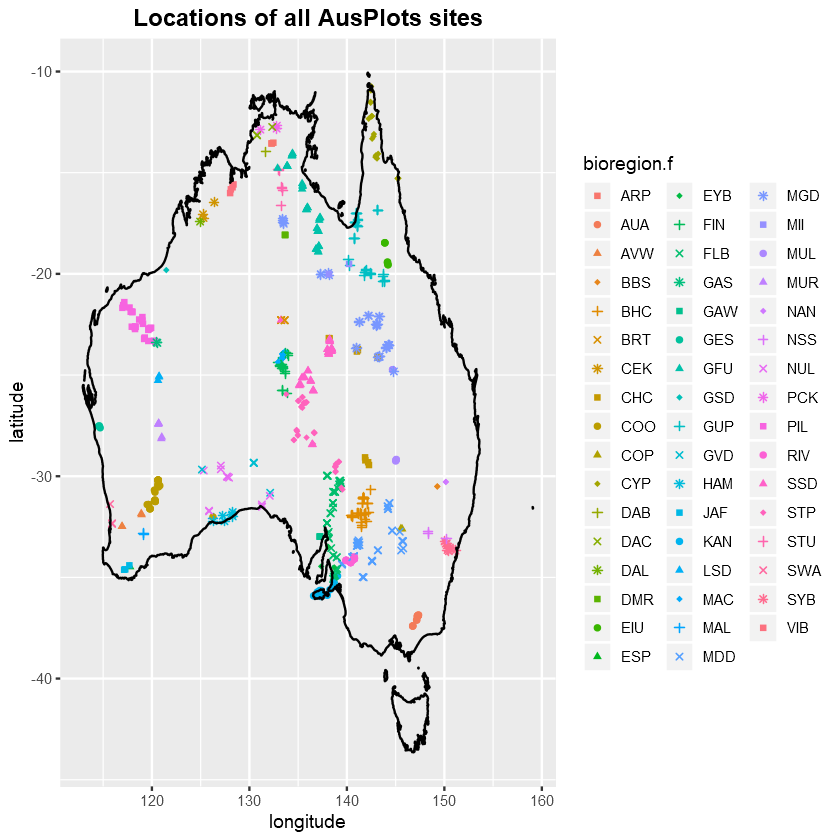

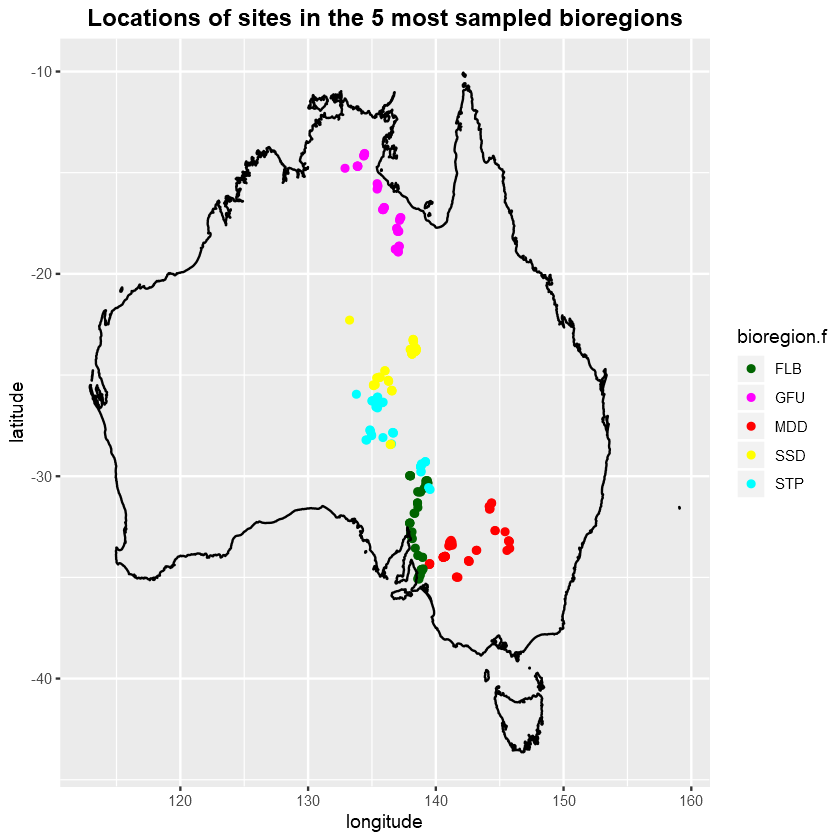

In [9]:

#----------------------------------------------------------------------------------------
# Get and Prepare a Map of Australia
#----------------------------------------------------------------------------------------

# Maps in the package 'maps' are projected in longlat by default
aus = map("worldHires", "Australia", fill=TRUE, xlim=c(110,160),ylim=c(-45,-5), mar=c(0,0,0,0), plot=FALSE)

# Convert map data to SpatialPolygons
#aus.sp = map2SpatialPolygons(aus, IDs=aus$names, proj4string=CRS("+proj=longlat"))
CRS("+init=epsg:4326") # More info (i.e. provides a datum)
aus.sp = map2SpatialPolygons(aus, IDs=aus$names, proj4string=CRS("+init=epsg:4326"))


#----------------------------------------------------------------------------------------
# Plot All AusPlots Sites on a Map of Australia
#----------------------------------------------------------------------------------------

# We well use 7 distinct symbol shapes to represent the AusPlots Sites (combined with 
# different colors). We will cycle through the 7 symbol shapes. We start by creating a
# vector of with symbol shapes codes as long as the number of bioregions in the current 
# version of the AusPlots dataset, cycling among the 7 shapes. What complicates this 
# process a bit is that the number of bioregions sampled changes with time, as additional 
# sites in different bioregions are sampled. Thus, we need to estimate the required number 
# of cycles of symbol shapes from the data. To do this we use the function ceiling, and 
# the cut back to the required number of symbol shapes as we might not need full cycles 
# (i.e. the number of sites might not be a multiple of 7; e.g. 50 sites require more than
# 7 cycles, so we use 8 and then trimm the vector from 56 (7 shapes * 8 cycles) to 50.

# Preparation: Create a vector with the symbol shapes values
bioregions.cnt = length(levels(AP.data$site.info$bioregion.f))
shape.cycles.num = ceiling(bioregions.cnt / 7) #  Using 7 distinct Symbol Shapes
sites.shape.values = rep(c(15:18,3:4,8),shape.cycles.num)[1:bioregions.cnt]

# Create Plot
ggplot( data=AP.data$site.info, 
		     aes(x = longitude, y = latitude, group=bioregion.f), alpha =0.5) + 
geom_point(aes(colour=bioregion.f, fill=bioregion.f, shape=bioregion.f), size=1.5) + 
scale_shape_manual(values=sites.shape.values) +  # Cycle through Symbol Types 
ggtitle("Locations of all AusPlots sites") + 
theme(plot.title = element_text(hjust = 0.5, face="bold", size=14)) +
geom_polygon(data=fortify(aus.sp), aes(x=long, y=lat, group=group), col="black", fill=NA)


#----------------------------------------------------------------------------------------
# Plot AusPlots sites in the 5 Bioregions on Map of Australia
#----------------------------------------------------------------------------------------
ggplot(data=AP.BioregTop5.l$site.info, aes(x = longitude, y = latitude, colour=bioregion.f, fill=bioregion.f), alpha =0.5) + 
geom_point(pch=21, size=1.5) + scale_colour_manual(values = c("darkgreen", "magenta", "red", "yellow", "cyan")) +
scale_fill_manual(values = c("darkgreen", "magenta", "red", "yellow", "cyan")) +
ggtitle("Locations of sites in the 5 most sampled bioregions") + 
theme(plot.title = element_text(hjust = 0.5, face="bold", size=14)) +
geom_polygon(data=fortify(aus.sp), aes(x=long, y=lat, group=group), col="black", fill=NA)



### SPECIES-LEVEL DATA: `species_table` function and species occurrence matrices 

 In this section, we will explore to how to obtain and use species occurrence data from AusPlots raw data. In particular, we will examine species cover/abundance, species presence/absence, multiple indices of species diversity, and rank-abundance plots for the sites in the 5 most sampled bioregions. 

#### First step: Create a species occurrence matrix

 The first step to work with species-level AusPlots data is to create a species occurrence matrix. The `species_table` function in the `ausplotsR` package can be used to effortlessly create this type of matrix. This function takes a data frame of individual raw point intercept hits (i.e. a `veg.PI` data frame) generated using the `get_ausplots` function and returns a 'species against sites' matrix. Four metrics can be selected to score species occurrence: 
 
  * _Presence/Absence_: Set by the argument `m_kind = PA`.
  * _Percent Cover_: Based on total frequency of hits. This is the most commonly used metric. Set by the argument `m_kind = percent_cover`.
  * _Frequency_: Based on proportional frequencies of presence on the 10 individual transects within a plot. Set by the argument `m_kind = freq`. It can be a measure of importance for low cover species.
  * _IVI_: A combination of cover and frequency. Set by the argument `m_kind = IVI`.

 If Percent Cover or IVI are used two types of cover type can be selected:
 
  * _Projected Foliage Cover_ (_PFC_):Hits scored as 'in canopy sky' are removed. Set by the argument `cover_type = PFC`. 
  * _Opaque Canopy Cover_ (_OCC_): Hits scored as 'in canopy sky' are retained. Set by the argument `cover_type = OCC`. 


In [10]:

# Use function 'species_table' in 'ausplotsR' package to create an Abundance per Site Table
# =========================================================================================
SppBYSites.BioregTop5 = species_table(AP.BioregTop5.l$veg.PI, m_kind="percent_cover", cover_type="PFC")
class(SppBYSites.BioregTop5)
dim(SppBYSites.BioregTop5) # Number of rows and columns in the matrix: Sites x Species
SppBYSites.BioregTop5[1:5, 1:5]


# Enrich Table with: Site_Location, Bioregion, Latitude, and Longitude
# ====================================================================

# Create a 'site_unique' variable in Species by Sites Table to relate both datasets
# ---------------------------------------------------------------------------------
SppBYSites.BioregTop5$site_unique = rownames(SppBYSites.BioregTop5)										

# Both DF have differente number of rows!
dim(SppBYSites.BioregTop5)
dim(AP.BioregTop5.l$site.info) 

# Enrich with: Bioregion, Latitude, and Longitude								
# -----------------------------------------------
SppBYSites.BioregTop5  = merge(SppBYSites.BioregTop5, AP.BioregTop5.l$site.info, by="site_unique")[,c(names(SppBYSites.BioregTop5), 
                                          "bioregion.f", "longitude", "latitude")]
SppBYSites.BioregTop5 = na.omit(SppBYSites.BioregTop5)
#head(SppBYSites.BioregTop5)
#summary(SppBYSites.BioregTop5)
head(names(SppBYSites.BioregTop5))


[1] "data.frame"

[1]  225 1220

,Abutilon.fraseri,Abutilon.halophilum,Abutilon.otocarpum,Abutilon.sp.,Acacia.adoxa
NSAMDD0001-56965,0,0,0,0,0
NSAMDD0002-56952,0,0,0,0,0
NSAMDD0003-56968,0,0,0,0,0
NSAMDD0004-56953,0,0,0,0,0
NSAMDD0005-56969,0,0,0,0,0


[1]  225 1221

[1] 231  44

[1] "Abutilon.fraseri"    "Abutilon.halophilum" "Abutilon.otocarpum" 
[4] "Abutilon.sp."        "Acacia.adoxa"        "Acacia.alleniana"


#### Species Abundance

 In AusPlots data, vegetation 'percent cover' is used as a surrogate of vegetation 'abundance'. In this section, we will examine percent cover by:

  * Site visit and species: That is, all cells in the 'Species by Sites' table. 
  * Species: By computing the column totals in the 'Species by Sites' table. 

#####  Percent Cover (Abundance) by Site Visit x Species


[1]  0.00000 81.18812

Abutilon.fraseri1 Abutilon.fraseri2 Abutilon.fraseri3 Abutilon.fraseri4 
                0                 0                 0                 0 
Abutilon.fraseri5 Abutilon.fraseri6 
                0                 0

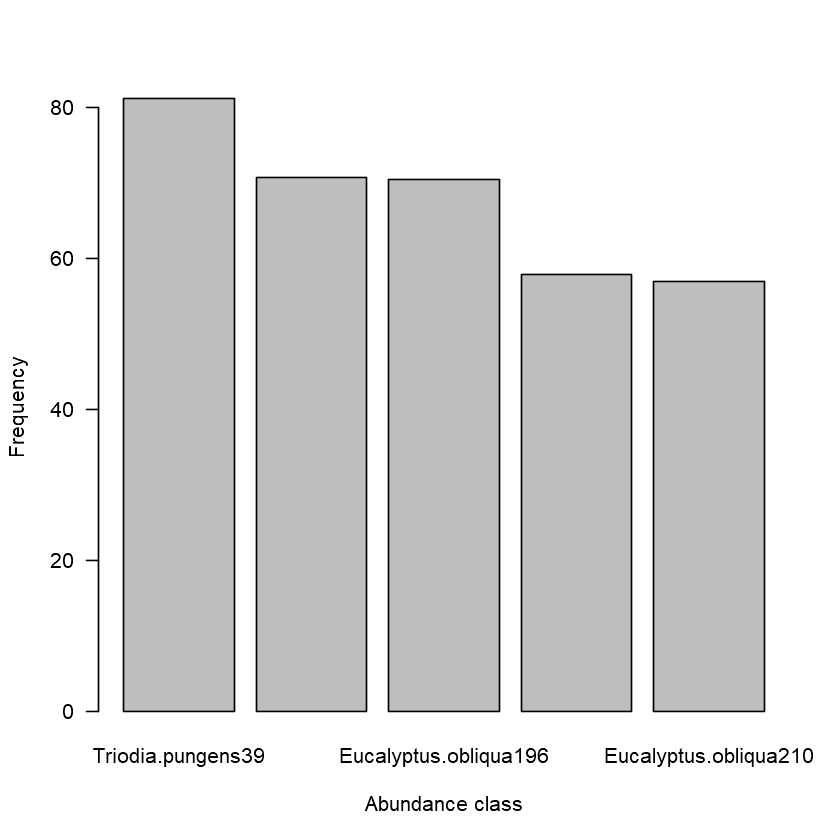

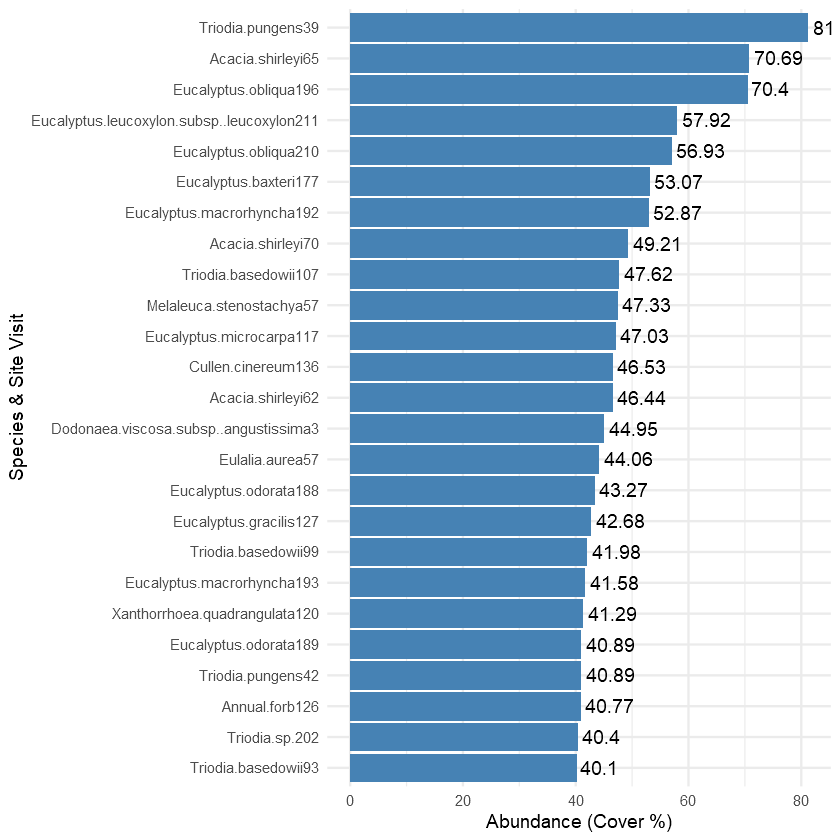

In [11]:

# Minimum and Maximum Site Visit x Species Abundance values
# ---------------------------------------------------------
# '-4' because we added 4 new columns (Plot, bioregion.f, longitude, and latitude)##
range(SppBYSites.BioregTop5[,1: (dim(SppBYSites.BioregTop5)[2]-4)])

# Plot Highest  Site Visit x Species Abundance values
# ---------------------------------------------------
Abundance = unlist(SppBYSites.BioregTop5[,1: (dim(SppBYSites.BioregTop5)[2]-4)])
head(Abundance)
#length(Abundance)
#dim(SppBYSites.BioregTop5)

# Plot the 5 Site Visits x Species combination with the Highest Abundances
par(mfrow=c(1,1))
barplot(sort(Abundance, decreasing=TRUE)[1:5], las=1, xlab="Abundance class", ylab="Frequency")

# ggplot2 graph to make it look nicer. Now we plot the 25 species-site visit covers with horizontal bars
temp.labs = names(sort(Abundance, decreasing=TRUE))
temp.Abundances = sort(Abundance, decreasing=TRUE)
temp.df = data.frame(temp.Abundances, temp.labs)
# Order factor levels so that bars are sorted by Abundance in the plot. Otherwise they would plotted in alphabetical order
# 'rev' to plot bars in decreasing order (i.e. larger bar at top; otherwise larger bar at bottom)
temp.df$temp.labs = factor(temp.df$temp.labs, levels=rev(temp.df$temp.labs))
ggplot(data=temp.df[1:25,], aes(x=temp.labs, y=temp.Abundances)) + 
geom_bar(stat="identity", fill="steelblue") +
geom_text(aes(label=round(temp.Abundances,2)), hjust=-0.1, size=4)+
labs(x="Species & Site Visit", y="Abundance (Cover %)") + 
theme_minimal() + coord_flip()
# Cleaning up
rm(list=ls(pattern="temp."))



#####  Abundance (Cover %) by Species

Now we compute the percent cover of all species across the sites in the 5 most sampled bioregions. Then we find and plot on a map of Australia the 4 most Abundant species in the 
5 regions (across all regions pooled together).


Abutilon.fraseri Abutilon.halophilum  Abutilon.otocarpum        Abutilon.sp. 
          0.1980198           1.3861386           2.2787055           0.5944519 
       Acacia.adoxa    Acacia.alleniana 
          0.4950495           1.1881188

[1] 321.4717

Triodia.basedowii 
             1155

Triodia.basedowii     Triodia.bitextura Schizachyrium.fragile 
             321.4717              283.4677              256.2688 
      Triodia.pungens 
             251.6832

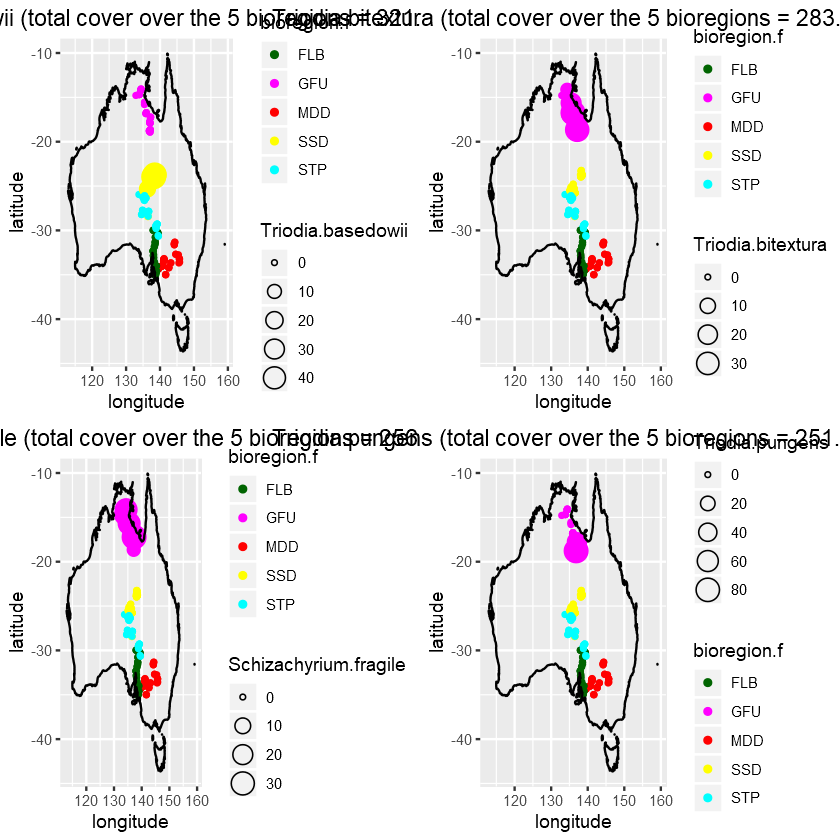

In [12]:

# Compute Species Total Abundance (Cover %)
# -----------------------------------------
TotAbundances.BioregTop5 = colSums(SppBYSites.BioregTop5[,1:(dim(SppBYSites.BioregTop5)[2]-4)])
head(TotAbundances.BioregTop5)

# Species with Highest Total Abundance 
# ------------------------------------
# Species with Highest Total Abundance
max(TotAbundances.BioregTop5)
which.max(TotAbundances.BioregTop5)
# Species with Top 4 Highest Abundances
TotAbundances4Highest.indices = 
     which(TotAbundances.BioregTop5 >= sort(TotAbundances.BioregTop5, decreasing=T)[4], arr.ind=T)
sort(TotAbundances.BioregTop5[TotAbundances4Highest.indices], decreasing=TRUE)

# Plot 4 Species with Highest Cover in the 5 Most Sampled Bioregions
# ------------------------------------------------------------------

# Most Abundant Species 
spp = names(sort(TotAbundances.BioregTop5[TotAbundances4Highest.indices], decreasing=TRUE))[1]
plot.title =  paste(spp, " (total cover over the 5 bioregions = ", 
                    round(sort(TotAbundances.BioregTop5[TotAbundances4Highest.indices], decreasing=TRUE)[1],2) , ")", sep="")
TotAbundance.spp1 = 
ggplot(data=SppBYSites.BioregTop5, aes(x=longitude, y=latitude, colour=bioregion.f, fill=bioregion.f), alpha =0.5) + 
geom_point(aes_string(size=spp), pch=21) + 
scale_colour_manual(values = c("darkgreen", "magenta", "red", "yellow", "cyan")) +
scale_fill_manual(values = c("darkgreen", "magenta", "red", "yellow", "cyan")) +
ggtitle(plot.title) + theme(plot.title = element_text(hjust = 0.5)) +			 
geom_polygon(data=fortify(aus.sp), aes(x=long, y=lat, group=group), col="black", fill=NA) 

# 2nd Most Abundant Species 
spp = names(sort(TotAbundances.BioregTop5[TotAbundances4Highest.indices], decreasing=TRUE))[2]
plot.title =  paste(spp, " (total cover over the 5 bioregions = ", 
                    round(sort(TotAbundances.BioregTop5[TotAbundances4Highest.indices], decreasing=TRUE)[2],2) , ")", sep="")
TotAbundance.spp2 = 
ggplot(data=SppBYSites.BioregTop5, aes(x=longitude, y=latitude, colour=bioregion.f, fill=bioregion.f), alpha =0.5) + 
geom_point(aes_string(size=spp), pch=21) + 
scale_colour_manual(values = c("darkgreen", "magenta", "red", "yellow", "cyan")) +
scale_fill_manual(values = c("darkgreen", "magenta", "red", "yellow", "cyan")) +
ggtitle(plot.title) + theme(plot.title = element_text(hjust = 0.5)) +			 
geom_polygon(data=fortify(aus.sp), aes(x=long, y=lat, group=group), col="black", fill=NA)

# 3rd Most Abundant Species 
spp = names(sort(TotAbundances.BioregTop5[TotAbundances4Highest.indices], decreasing=TRUE))[3]
plot.title =  paste(spp, " (total cover over the 5 bioregions = ", 
                    round(sort(TotAbundances.BioregTop5[TotAbundances4Highest.indices], decreasing=TRUE)[3],2) , ")", sep="")
TotAbundance.spp3 = 
ggplot(data=SppBYSites.BioregTop5, aes(x=longitude, y=latitude, colour=bioregion.f, fill=bioregion.f), alpha =0.5) + 
geom_point(aes_string(size=spp), pch=21) + 
scale_colour_manual(values = c("darkgreen", "magenta", "red", "yellow", "cyan")) +
scale_fill_manual(values = c("darkgreen", "magenta", "red", "yellow", "cyan")) +
ggtitle(plot.title) + theme(plot.title = element_text(hjust = 0.5)) +			 
geom_polygon(data=fortify(aus.sp), aes(x=long, y=lat, group=group), col="black", fill=NA)

# 4th Most Abundant Species 
spp = names(sort(TotAbundances.BioregTop5[TotAbundances4Highest.indices], decreasing=TRUE))[4]
plot.title =  paste(spp, " (total cover over the 5 bioregions = ", 
                    round(sort(TotAbundances.BioregTop5[TotAbundances4Highest.indices], decreasing=TRUE)[4],2) , ")", sep="")
TotAbundance.spp4 = 
ggplot(data=SppBYSites.BioregTop5, aes(x=longitude, y=latitude, colour=bioregion.f, fill=bioregion.f), alpha =0.5) + 
geom_point(aes_string(size=spp), pch=21) + 
scale_colour_manual(values = c("darkgreen", "magenta", "red", "yellow", "cyan")) +
scale_fill_manual(values = c("darkgreen", "magenta", "red", "yellow", "cyan")) +
ggtitle(plot.title) + theme(plot.title = element_text(hjust = 0.5)) +			 
geom_polygon(data=fortify(aus.sp), aes(x=long, y=lat, group=group), col="black", fill=NA)

# Plot the 4 Graphs
grid.arrange(TotAbundance.spp1, TotAbundance.spp2, TotAbundance.spp3, TotAbundance.spp4, nrow=2)



#### Species Occurrence (Presence/Absence)
 
 We next focus on species occurrence data; that is, whether as species is Present/Absent. We can compute Presence/Absence data in several ways:
 
 * Re-use the 'percent cover' data we used above: If percent cover is > 0 then the species is present, if percent cover = 0 then the species is absent. 
 * Use the `species_table` function with the argument `m_kind = PA` on the data frame with raw point intercept data (i.e. `veg.PI`) generated by the function `get_auplots`.
 * Use the `species_table` function with the argument `m_kind = PA` on the data frame with vegetation vouchers data (a complete set of species records for the plot determined by a herbarium; i.e. `veg.vouchers`) generated by the function `get_auplots`. This option provides the most complete species inventories by sites.
 
 Here we use the first option for simplicity and generality (i.e. how these tasks can be performed with other abundance data outside AusPlots). As for the Abundance/Percent Cover data, we first examine species occurrence across all cells (i.e. combinations of site visits and species), and then investigate and plot the total number of (absolute and relative) occurrences for each species. 


[1] 4394

[1] 270106

[1] 0.01600729

[1] 0.9839927

[1] "Abutilon.fraseri"    "Abutilon.halophilum" "Abutilon.otocarpum" 
[4] "Abutilon.sp."        "Acacia.adoxa"        "Acacia.alleniana"

Annual.forb          Annual.grass       Dead.tree.shrub 
                  106                    89                    49 
      Sida.fibulifera    Aristida.holathera Schizachyrium.fragile 
                   39                    36                    31

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


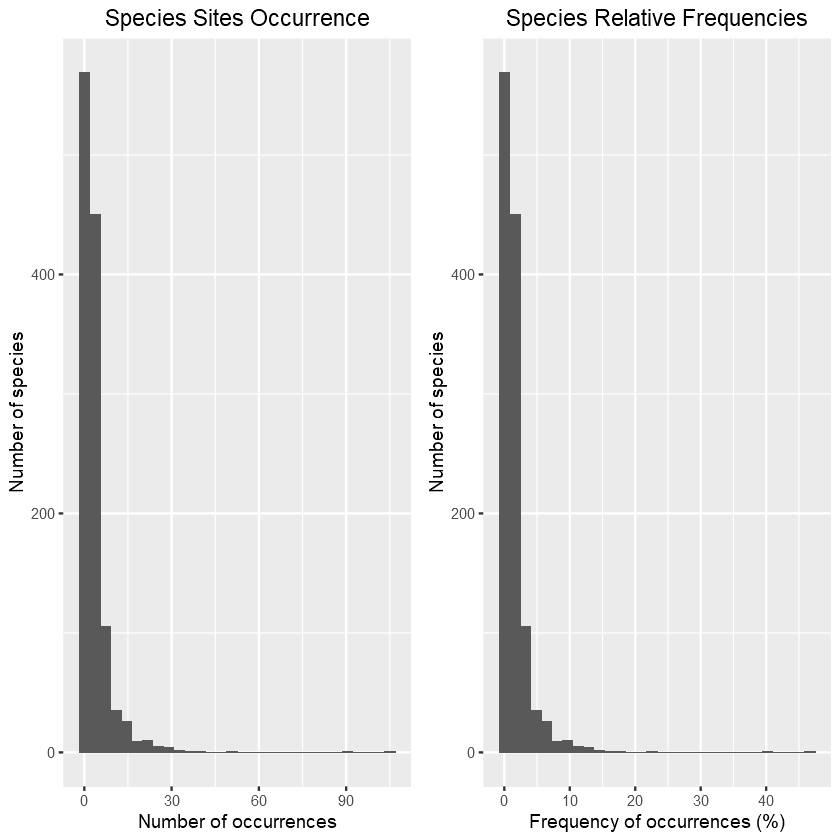

In [13]:

# Presence/Absence across all Cells (i.e. Site Visit x Species)
# =============================================================

# Absolute Presences/Absences
# ---------------------------
 # Number of Presences
sum(Abundance > 0)
 # Number of Absences
sum(Abundance == 0)

# Relative (%) Presences/Absences
# -------------------------------
num.cells = (nrow(SppBYSites.BioregTop5[1: (dim(SppBYSites.BioregTop5)[1]-3)]) * ncol(SppBYSites.BioregTop5[,1:(dim(SppBYSites.BioregTop5)[2]-4)]))
 # % of Presences
sum(SppBYSites.BioregTop5[,1:(dim(SppBYSites.BioregTop5)[2]-4)] > 0)/ num.cells 
 # % of Absences
sum(SppBYSites.BioregTop5[,1:(dim(SppBYSites.BioregTop5)[2]-4)] == 0) / num.cells


# Total Presence/Absence  for each Species (i.e. per data frame Column)
# =====================================================================

# Compute number of sites where each species is present (sum by columns)
head(names(SppBYSites.BioregTop5)) # Species are in columns
SppPres.BioregTop5 = apply(SppBYSites.BioregTop5[,1:(dim(SppBYSites.BioregTop5)[2]-4)]>0, 2,sum)

# Sort results in increasing order
head(sort(SppPres.BioregTop5, decreasing = TRUE))

# Compute Percentage Frequencies
SppRelFreq.BioregTop5 =  SppPres.BioregTop5 * 100 / nrow(SppBYSites.BioregTop5)

# Plot Species Frequencies
par(mfrow=c(1,1))
spp.freq.p1 = ggplot() + geom_histogram(aes(SppPres.BioregTop5)) + 
              ggtitle("Species Sites Occurrence") + 
			  theme(plot.title = element_text(hjust = 0.5)) +
			  xlab("Number of occurrences") + ylab("Number of species")
spp.freq.p2 = ggplot() + geom_histogram(aes(SppRelFreq.BioregTop5)) + 
              ggtitle("Species Relative Frequencies") + 
			  theme(plot.title = element_text(hjust = 0.5)) +
			  xlab("Frequency of occurrences (%)") + ylab("Number of species")
grid.arrange(spp.freq.p1, spp.freq.p2, ncol=2)


 
#### Species Diversity

  On our exploration of the use of Species-lelvel AusPlots data, we now focus on Species Diversity. We first compute 7 common diversity indices, which we then place in a dataset. Finally, as an example, we plot two of these indices (Species Richness and Shanon Diversity Index) for the sites in the 5 most sampled bioregions on a map of Australia. 
  
NOTE: Diversity indices were originally designed to be used with counts of number of individuals per species, rather than percent cover, as a measure of abundance. These indices are also used with percent cover in the literature (see Tomasckik and Sander, 1987 for an example using coral cover). We need, however, to be aware of the different kind of answers and interpretation of the results required. 


       N0              H               N1               N2        
 Min.   : 1.00   Min.   :0.000   Min.   : 1.000   Min.   : 1.000  
 1st Qu.:14.00   1st Qu.:1.410   1st Qu.: 4.096   1st Qu.: 2.830  
 Median :19.00   Median :1.809   Median : 6.103   Median : 4.246  
 Mean   :19.53   Mean   :1.809   Mean   : 7.084   Mean   : 4.754  
 3rd Qu.:25.00   3rd Qu.:2.220   3rd Qu.: 9.209   3rd Qu.: 6.202  
 Max.   :43.00   Max.   :3.103   Max.   :22.257   Max.   :15.240  
                                                                  
       E1                E2                J          bioregion.f
 Min.   :0.08624   Min.   :0.05508   Min.   :0.1727   FLB:48     
 1st Qu.:0.26863   1st Qu.:0.17313   1st Qu.:0.5511   GFU:41     
 Median :0.35648   Median :0.23439   Median :0.6468   MDD:50     
 Mean   :0.37763   Mean   :0.26445   Mean   :0.6277   SSD:46     
 3rd Qu.:0.45174   3rd Qu.:0.31907   3rd Qu.:0.7215   STP:40     
 Max.   :1.00000   Max.   :1.00000   Max.   :0.9610              
  

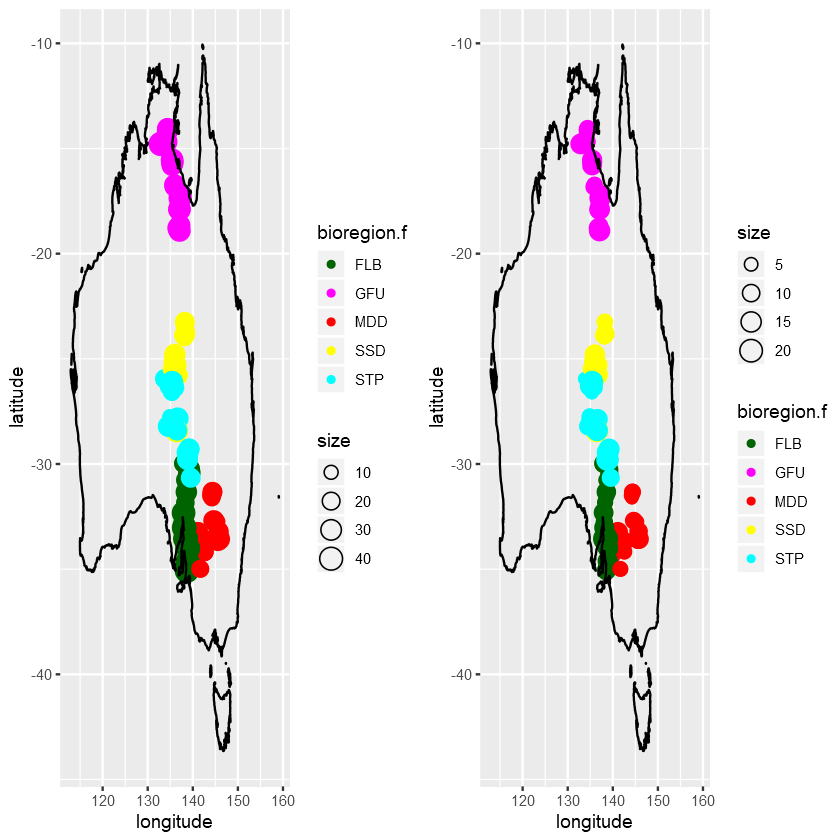

In [14]:

# Compute and place in a DF the Species Diversity Indices
# =======================================================

# Species Richness
N0 = rowSums(SppBYSites.BioregTop5[,1:(dim(SppBYSites.BioregTop5)[2]-4)] > 0)
# Shannon Entropy
H = diversity(SppBYSites.BioregTop5[,1:(dim(SppBYSites.BioregTop5)[2]-4)])
# Shannon Diversity Index
N1 = exp(H)
# Simpson Diversity Index
N2 = diversity(SppBYSites.BioregTop5[,1:(dim(SppBYSites.BioregTop5)[2]-4)], "inv")
# Shannon Evenness (Hill's ratio)
E1 = N1/N0
# Simpson Evenness (Hill's ratio)
E2 = N2/N0
# Pielou Evenness
J = H/log(N0)

# Create a Data Frame with the Species Diversity Indices
SppBYSites.BioregTop.Div.df = data.frame(N0, H, N1, N2, E1, E2, J)


# Map Species Richness and Shannon Diversity Index (as an example)
# ================================================================

# Add extra info to DataFrame (Bioregions, longitude, and latitude)
SppBYSites.BioregTop.Div.df$bioregion.f = SppBYSites.BioregTop5[rownames(SppBYSites.BioregTop.Div.df),"bioregion.f"]
SppBYSites.BioregTop.Div.df$longitude = SppBYSites.BioregTop5[rownames(SppBYSites.BioregTop.Div.df),"longitude"]
SppBYSites.BioregTop.Div.df$latitude = SppBYSites.BioregTop5[rownames(SppBYSites.BioregTop.Div.df),"latitude"]
summary(SppBYSites.BioregTop.Div.df) 

# Create Species Richness Plot
Div.SR = 
ggplot(data=SppBYSites.BioregTop.Div.df, aes(x=longitude, y=latitude, colour=bioregion.f, fill=bioregion.f), alpha =0.5) + 
geom_point(aes_string(size=N0), pch=21) + 
scale_colour_manual(values = c("darkgreen", "magenta", "red", "yellow", "cyan")) +
scale_fill_manual(values = c("darkgreen", "magenta", "red", "yellow", "cyan")) +
geom_polygon(data=fortify(aus.sp), aes(x=long, y=lat, group=group), col="black", fill=NA)

# Create Shanon Diversity Index Plot
Div.ShannonIndex = 
ggplot(data=SppBYSites.BioregTop.Div.df, aes(x=longitude, y=latitude, colour=bioregion.f, fill=bioregion.f), alpha =0.5) + 
geom_point(aes_string(size=N1), pch=21) + 
scale_colour_manual(values = c("darkgreen", "magenta", "red", "yellow", "cyan")) +
scale_fill_manual(values = c("darkgreen", "magenta", "red", "yellow", "cyan")) +
geom_polygon(data=fortify(aus.sp), aes(x=long, y=lat, group=group), col="black", fill=NA)

# Plot the 2 graphs
grid.arrange(Div.SR, Div.ShannonIndex, ncol=2)



#### Rank-Abundance Curves & Relative Abundance Models

 For the final example of downstream visualisation and analysis of Species-level AusPlots data, we focus on Rank-Abundance Curves (also known as Whittaker Plots). Rank-Abundance Curves provide further information on species diversity. They provide a more complete picture than a single diversity index. Their x-axis represents the abundance rank (from most to least abundant) and in the y-axis the species relative abundance. Thus, they depict both Species Richness (number of different in ranked) and Species Evenness (slope of the line that fits the rank; steep gradient indicates low evenness and a shallow gradient high evenness). 
 
  In this section we:
  
  * We plot the Rank-Abundance Curves for the first 5 Site-Visits in our 5 most sampled bioregions dataset.
  * We show a quick example of the fitting of possible Models of Relative Abundance for one Community.
  * We compute the mean cover for each species in the 5 most sampled Bioregions and then plot the Rank-Abundance Curves for the 5 Bioregions. 


[1] "FLB" "GFU" "MDD" "SSD" "STP"

[1] "SppCover.GFU.Mean" "SppCover.MDD.Mean" "SppCover.PIL.Mean"
[4] "SppCover.SSD.Mean" "SppCover.STP.Mean"

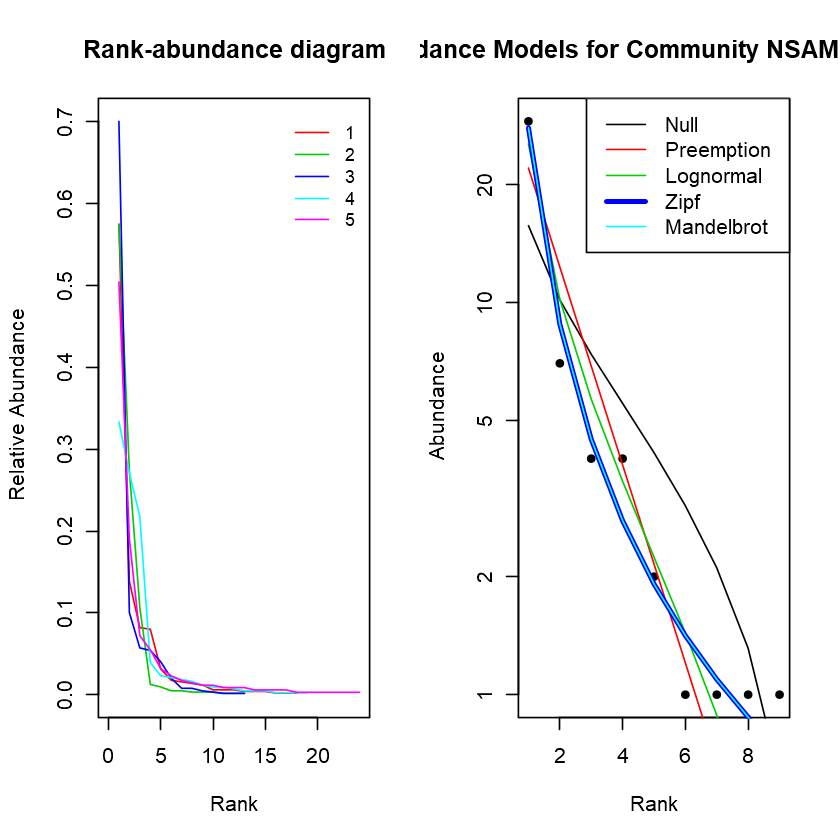

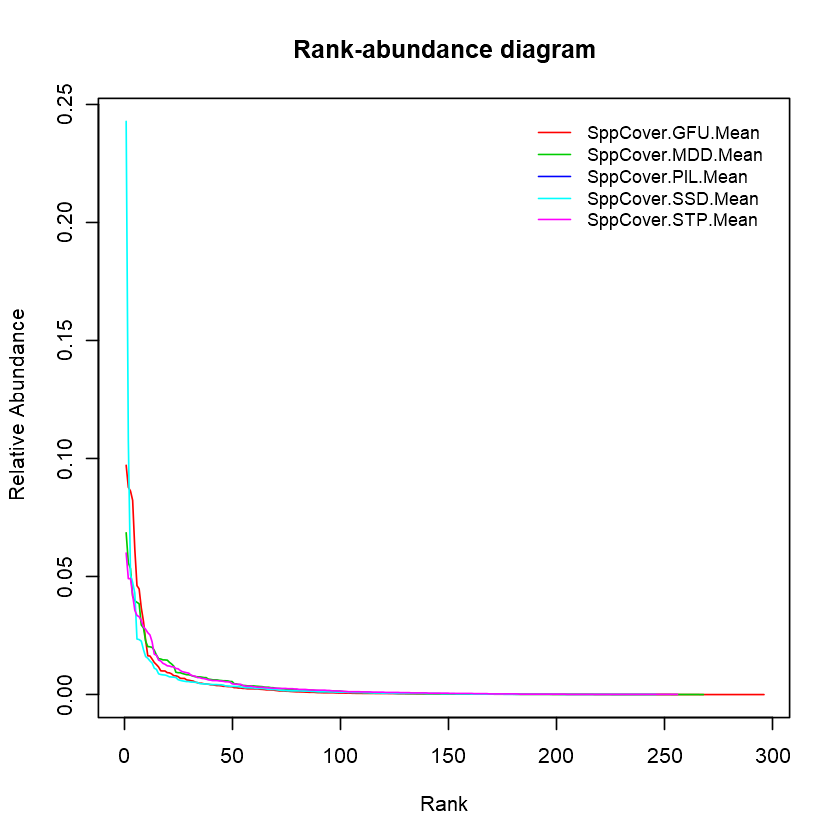

In [15]:

par(mfrow=c(1,2))

# Rank-Abundance Curves (= Whittaker Plots) for the First 5 Site-Visits
# =====================================================================
goeveg::racurves(SppBYSites.BioregTop5[1:5,1:(dim(SppBYSites.BioregTop5)[2]-4)], bw=F)


# Possible Models of Relative Abundance for one Community
# =======================================================
plot(vegan::radfit(round(SppBYSites.BioregTop5[1,1:(dim(SppBYSites.BioregTop5)[2]-4)], digits=0), log="xy"),
     pch=20, main="Rel. Abundance Models for Community NSAMDD0001-56965")


# Rank-Abundance Curves (= Whittaker Plots) for each Bioregion (using the Spp. Mean Cover)
# ======================================================================================== 

# Compute Species Mean Cover for each of the 5 most sampled Bioregions
levels(SppBYSites.BioregTop5$bioregion.f)
 # GFU
SppCover.GFU.Mean = apply(SppBYSites.BioregTop5[SppBYSites.BioregTop5$bioregion.f=="GFU",1:(dim(SppBYSites.BioregTop5)[2]-4)], 2, mean)
#head(SppCover.GFU.Mean)
 # MDD
SppCover.MDD.Mean = apply(SppBYSites.BioregTop5[SppBYSites.BioregTop5$bioregion.f=="MDD",1:(dim(SppBYSites.BioregTop5)[2]-4)], 2, mean)
#head(SppCover.MDD.Mean)
 # PIL
SppCover.PIL.Mean = apply(SppBYSites.BioregTop5[SppBYSites.BioregTop5$bioregion.f=="PIL",1:(dim(SppBYSites.BioregTop5)[2]-4)], 2, mean)
#head(SppCover.PIL.Mean)
 # SSD
SppCover.SSD.Mean = apply(SppBYSites.BioregTop5[SppBYSites.BioregTop5$bioregion.f=="SSD",1:(dim(SppBYSites.BioregTop5)[2]-4)], 2, mean)
#head(SppCover.SSD.Mean)
 # STP
SppCover.STP.Mean = apply(SppBYSites.BioregTop5[SppBYSites.BioregTop5$bioregion.f=="STP",1:(dim(SppBYSites.BioregTop5)[2]-4)], 2, mean)
#head(SppCover.STP.Mean)

# Create a Matrix with Species Means per Bioregion
SppCover.BioregionMean.m = rbind(SppCover.GFU.Mean, SppCover.MDD.Mean, SppCover.PIL.Mean, SppCover.SSD.Mean, SppCover.STP.Mean)
rownames(SppCover.BioregionMean.m)

# Rank-Abundance Curves (= Whittaker Plots) for the Species Cover Mean in each of the 5 Bioregions
par(mfrow=c(1,1))
goeveg::racurves(SppCover.BioregionMean.m, bw=F)



### PROPORTIONAL VEGETATION COVER (= FRACTIONAL COVER): `fractional_cover` function

The `fractional_cover` function in the `auscoverR` package calculates fractional cover from AusPlots point intercept (PI) data (as generated by `get_ausplots`). Fractional cover refers to the proportions of green vegetation, dead vegetation and bare substrate cover. Cover fractions are assigned as follows:
* _'Green'_ or _'photosynthetic vegetation'_: is living vascular plant cover.
* _'Brown'_ or _'non-photosynthetic vegetation'_: is either vascular plant cover scored as 'dead', or substrate scored as litter, coarse woody debris or cryptogam (see below) that has no other veg cover.
* _'Bare'_ or _'bare ground'_: is rock, outcrop, gravel or bare soil with no veg cover substrate.

Typically, 1010 intercept points are used to compute fractional cover in a plot. These 1010 intercept points correspond to 101 points per transect (i.e. 101 points at 1 meters intervals in each of the 100 metres long transect) x 10 transects (5 transects oriented North to South and 5 oriented East to West). Further details about the AusPlots methods can be found in TERN's DSDP [AusPlots Methods Knowledge Base](https://ternaus.atlassian.net/wiki/spaces/ESM/pages/651329908/Ecosystem+Surveillance+Monitoring+-+AusPlots+Methods) and the [AusPlots Rangelands Survey Protocol Manual](https://www.tern.org.au/AusPlots-Rangelands-Survey-Protocols-Manual-pg23944.html). The percentage scored for each fraction is computed as the number of hits assigned to each fraction times 100 divided by the total number of PIs taken (usually 1010, but this number can vary).

A height rule is applied, so that scoring the green/brown/bare fraction from point intercept hits of the uppermost vegetation/substrate stratum overrides the others. That is, a dead tree overrides a living shrub beneath and vice versa. Similarly, any vegetation cover overrides substrate coding, etc. This means for each of the intercepts, there is a single coding. 

Arguments:
* `ground_fractional`: When set to 'TRUE' it computes fractional cover exclusively for Ground Cover. That is, fractional cover is computed only for grasses (hummock, tussock, other); sedge; rush; forb; fern; and vine plant growth forms. Presently, cryptogam cover is excluded, and included in the non-photosynthetic fraction instead. The default for this argument is 'FALSE'.
* `in_canopy_sky`: With the default value (`in_canopy_sky = FALSE`), only the substrate is considered for those hits. This argument applies only to regular fractional cover (i.e. for `ground_fractional = FALSE`), as trees are excluded in the green fraction for ground fractional cover by default.

Occasionally, substrate type was not collected (i.e. 'NC') or could not be assigned to one of the above categories (i.e. 'Unknwn'). In these cases, if there was no vegetation cover above those points percent cover is scored as an 'NA' fraction.

The `fractional_cover` function returns a data frame. In this data frame rows denote plots, columns denote fractions (i.e. bare, brown, green, and NA), and values are cover percentages.


 In this section we will explore: 
 
  * The Latitudinal Pattern in Proportional Vegetation Cover (for a random subest of 200 sites).
  * Temporal Variation in fractional cover: Explore, display, and assess (for 5 sites visited twice).


#### Latitudinal Pattern in Proportional Vegetation Cover

 In this seection we will follow these steps:
 
 * Call the `fractional_cover` function on the extracted point intercept data. This calculation may take a few minutes for all AusPlots, so for this example we will work with a random subset of 200 randomly drawn sites.
 * Plot the Latitudinal Pattern in Proportional Vegetation Cover (here we use the 'Proportion of Bare Ground'). To do this, we first enrich the dataset with additional variables including: 'Plot' (identifier for each Site-Visit combination), 'bioregion.f', 'longitude', and 'latitude'. 
 * Fit a Quadratic Model to the data and examine its Fit, as there appears to be a humpbacked relationship in the previous plot (higher proportionof bare ground in the arid inland at mid-latitudes). 


Warning message in reshapeWide(data, idvar = idvar, timevar = timevar, varying = varying, :
"there are records with missing times, which will be dropped."

,site_unique,bare,brown,green,NA.
NSABHC0001-53596,NSABHC0001-53596,31.26,42.24,26.51,0
NSABHC0003-53598,NSABHC0003-53598,46.57,28.14,25.29,0
NSABHC0005-53600,NSABHC0005-53600,20.30,32.77,46.93,0
NSABHC0009-53604,NSABHC0009-53604,31.29,27.23,41.49,0
NSABHC0009-58026,NSABHC0009-58026,27.03,29.21,43.76,0
NSABHC0011-53606,NSABHC0011-53606,36.18,29.80,34.02,0


site_unique,bare,brown,green,NA.,bioregion.f,longitude,latitude
NSABHC0001-53596,31.26,42.24,26.51,0,BHC,141.4338,-31.89335
NSABHC0003-53598,46.57,28.14,25.29,0,BHC,141.4340,-31.82872
NSABHC0005-53600,20.30,32.77,46.93,0,BHC,141.9405,-31.84496
NSABHC0009-53604,31.29,27.23,41.49,0,BHC,141.6974,-31.08023
NSABHC0009-58026,27.03,29.21,43.76,0,BHC,141.6974,-31.08023
NSABHC0011-53606,36.18,29.80,34.02,0,BHC,141.6781,-31.02532


 site_unique             bare           brown           green      
 Length:219         Min.   : 0.20   Min.   : 3.47   Min.   : 2.08  
 Class :character   1st Qu.:11.44   1st Qu.:21.23   1st Qu.:21.98  
 Mode  :character   Median :23.96   Median :29.91   Median :38.61  
                    Mean   :28.48   Mean   :30.89   Mean   :40.52  
                    3rd Qu.:42.12   3rd Qu.:40.11   3rd Qu.:52.67  
                    Max.   :94.06   Max.   :74.26   Max.   :96.34  
                                                                   
      NA.          bioregion.f    longitude        latitude     
 Min.   :0.0000   FLB    : 20   Min.   :114.5   Min.   :-37.41  
 1st Qu.:0.0000   SSD    : 19   1st Qu.:133.5   1st Qu.:-32.41  
 Median :0.0000   STP    : 17   Median :138.3   Median :-29.31  
 Mean   :0.1132   BHC    : 16   Mean   :136.6   Mean   :-27.30  
 3rd Qu.:0.0000   COO    : 12   3rd Qu.:141.0   3rd Qu.:-23.38  
 Max.   :6.6300   GFU    : 12   Max.   :150.6   Max.   :-12.82  
 

[1] "site_unique" "bare"        "brown"       "green"       "NA."        
[6] "bioregion.f" "longitude"   "latitude"


Call:
lm(formula = bare ~ latitude + I(latitude^2), data = AP.200Locs.FC)

Residuals:
    Min      1Q  Median      3Q     Max 
-38.006 -11.069  -1.966   8.893  69.026 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -165.00098   18.95734  -8.704 8.32e-16 ***
latitude       -16.75312    1.52578 -10.980  < 2e-16 ***
I(latitude^2)   -0.33584    0.02939 -11.428  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 16.97 on 216 degrees of freedom
Multiple R-squared:  0.3937,	Adjusted R-squared:  0.3881 
F-statistic: 70.14 on 2 and 216 DF,  p-value: < 2.2e-16


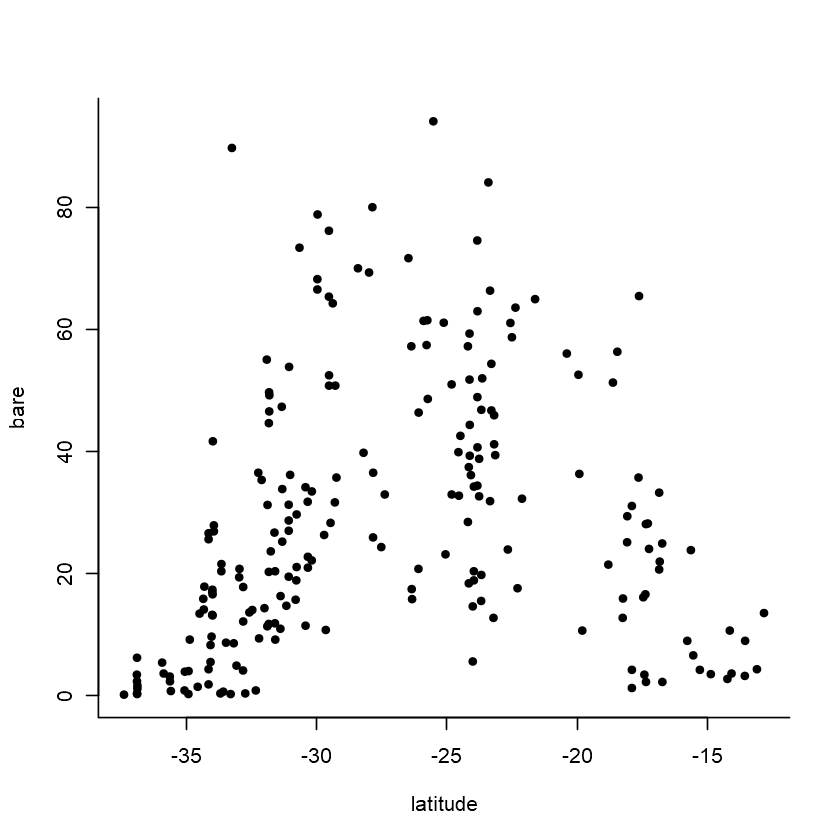

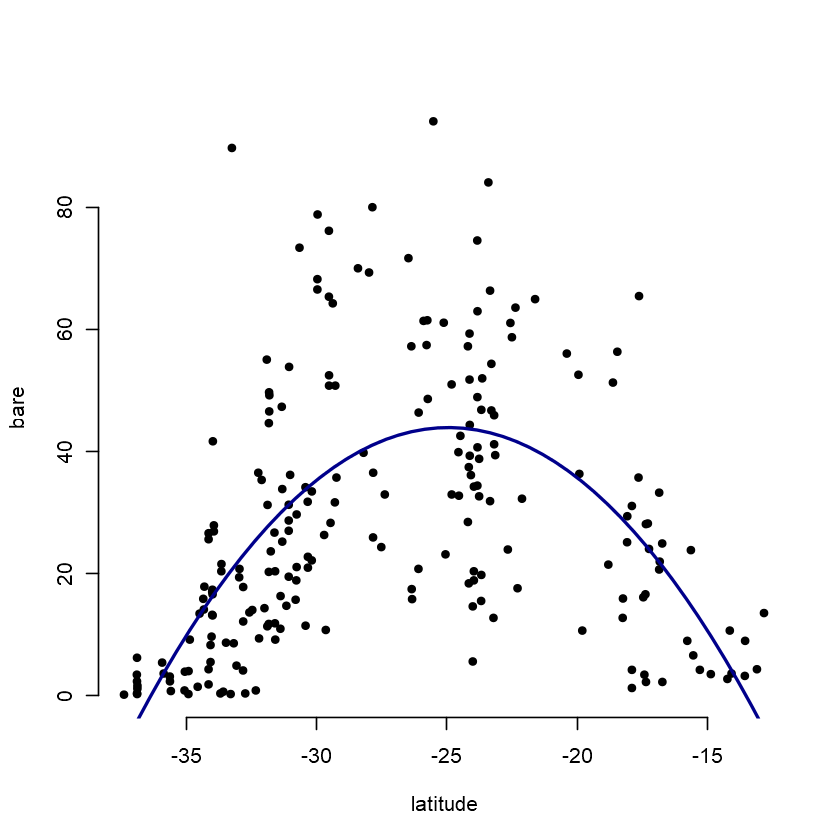

In [16]:

# First, we call the fractional_cover function on the extracted point intercept data. 
# NOTE: Calculation may take a few minutes for all AusPlots, so for this example 
# we will pull out a subset of 200 randomly drawn sites to work with. 
# The sets site composition will differ each time the script is run, 
# as they are random subsets. 


# Compute Fractional Cover using function 'fractional_cover`
# ---------------------------------------------------------
AP.200Locs.FC =
fractional_cover(AP.data$veg.PI[AP.data$veg.PI$site_location_name %in% 
				                        sample(AP.data$site.info$site_location_name, 200), ])
# To use the Full Data set substitute the command above by this one:
# fractional_cover(AP.data$veg.PI[AP.data$veg.PI$site_location_name %in% 
#                                 AP.data$site.info$site_location_name, ])  
#AP.200Locs.FC = na.omit(AP.200Loc.FC)
head(AP.200Locs.FC)


# Enrich with: Bioregion, Latitude, and Longitude
# -----------------------------------------------
AP.200Locs.FC  = merge(AP.200Locs.FC, AP.data$site.info, by="site_unique")[,c("site_unique", "bare", "brown", "green", "NA.", "bioregion.f", "longitude", "latitude")]
AP.200Locs.FC = na.omit(AP.200Locs.FC)
head(AP.200Locs.FC)
summary(AP.200Locs.FC)
names(AP.200Locs.FC)


# Plot out the continental relationship between Fractional Cover 
# --------------------------------------------------------------
# Here we use the 'Proportion of Bare Ground' & Latitude

# Plot the relationship between Proportion of Bare Ground (with no kind of vegetation cover above) and Latitude.
par(mfrow=c(1,1))
plot(bare ~ latitude, data=AP.200Locs.FC, pch=20, bty="l")


# Quadratic LM of Continental Relationship between Bare Ground Fractional Cover & Latitude
# ----------------------------------------------------------------------------------------

# Fit & Examine as Quadratic Linear Model the Continental Relationship between Bare Ground Fractional Cover & Latitude
AP.200Locs.FC.lm = lm(bare ~ latitude + I(latitude^2), data=AP.200Locs.FC)
summary(AP.200Locs.FC.lm)

# Predict values from Model Fit
pred.df = data.frame(latitude=seq(from=min(AP.200Locs.FC$latitude), to=max(AP.200Locs.FC$latitude), length.out=50))
pred.df$pred = predict(AP.200Locs.FC.lm, pred.df)

# Plot Predicted Values from Model Fit on Graph with Continental Relationship between Bare Ground Fractional Cover & Latitude
plot(bare ~ latitude, data=AP.200Locs.FC, pch=20, bty="n")
points(pred.df$latitude, pred.df$pred, type="l", lwd=2, col="darkblue")



#### Temporal Variation in Fractional Cover: Explore, display, and assess (for 5 sites visited twice)

In the second section on Fractional Cover, we first Identify Sites that have been sampled more than once over time (in the 5 most sampled bioregions). Then we visually compare the Temporal Variation in Fractional Cover in these sites using Piecharts. 


[1] 219

[1] 191   2

[1] 28  2

[1] 28

[1] 56  8

[1] "site_unique"      "bare"             "brown"            "green"           
[5] "NA."              "bioregion.f"      "longitude"        "latitude"        
[9] "visit_start_date"

[1] "QDASSD0001-53756.2014" "QDASSD0001-57621.2015" "QDASSD0002-53757.2014"
[4] "QDASSD0002-57622.2015" "QDASSD0003-56912.2014" "QDASSD0003-57623.2015"

site_unique,bare,brown,green,NA.,bioregion.f,longitude,latitude,visit_start_date,site_unique.Yr
QDASSD0001-53756,38.81,28.10,32.99,0.1,SSD,138.4765,-23.76407,2014-04-30T00:00:00,QDASSD0001-53756.2014
QDASSD0001-57621,32.67,33.37,33.96,0.0,SSD,138.4765,-23.76407,2015-04-25T00:00:00,QDASSD0001-57621.2015
QDASSD0002-53757,62.97,16.93,20.10,0.0,SSD,138.3897,-23.82772,2014-05-01T00:00:00,QDASSD0002-53757.2014
QDASSD0002-57622,40.69,29.50,29.80,0.0,SSD,138.3897,-23.82772,2015-04-16T00:00:00,QDASSD0002-57622.2015
QDASSD0003-56912,48.91,35.45,15.64,0.0,SSD,138.4074,-23.83157,2014-05-01T00:00:00,QDASSD0003-56912.2014
QDASSD0003-57623,34.42,38.08,27.50,0.0,SSD,138.4074,-23.83157,2015-04-16T00:00:00,QDASSD0003-57623.2015


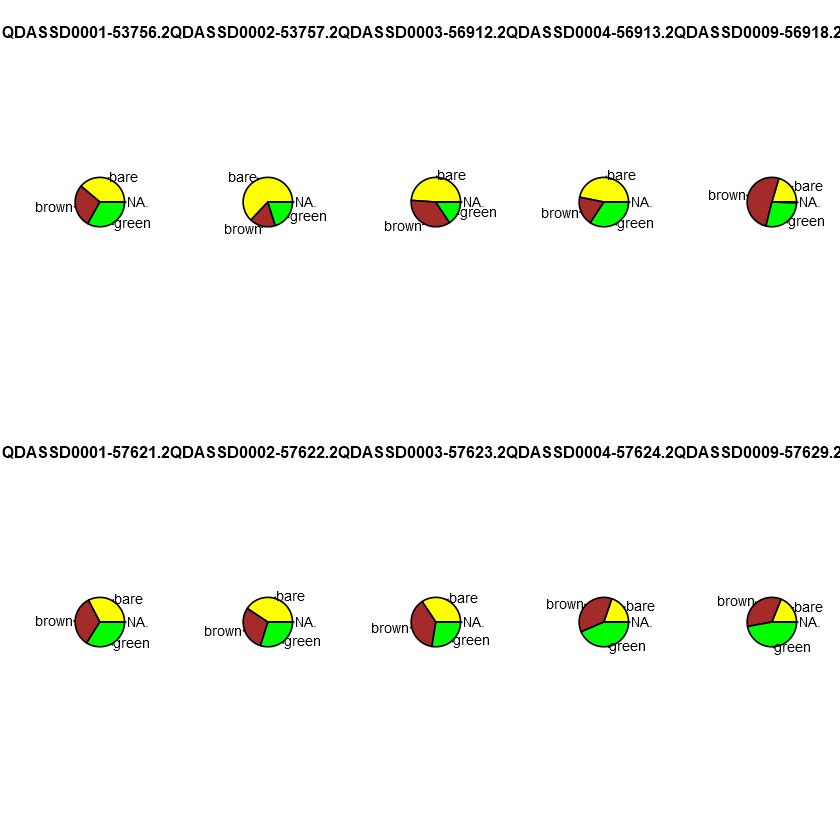

In [17]:

# Find Sites Sampled > 1 time
# ---------------------------
# Extract Sites Names
AP.200Locs.FC.locs = sub("\\-.*", "", AP.200Locs.FC$site_unique)
length(AP.200Locs.FC.locs)
# Calculate the Sample Frequency of each Site
AP.200Locs.FC.locs.cnt = count(AP.200Locs.FC.locs)
dim(AP.200Locs.FC.locs.cnt)
# Find Sites with > 1 Samples (in veg.IP)
AP.200Locs.FC.Resampled.locs.cnt = AP.200Locs.FC.locs.cnt[AP.200Locs.FC.locs.cnt$freq > 1,]
dim(AP.200Locs.FC.Resampled.locs.cnt)
AP.200Locs.FC.Resampled.locs.cnt = AP.200Locs.FC.Resampled.locs.cnt$x
length(AP.200Locs.FC.Resampled.locs.cnt)

# Subset the Resampled Sites (i.e. with 'freq' > 1)
# -------------------------------------------------
# Extract AP.200Locs.FC subset for Sites with > 1 Samples (in veg.IP)
AP.200Locs.FC.Resampled.Locs = AP.200Locs.FC[(AP.200Locs.FC.locs %in% AP.200Locs.FC.Resampled.locs.cnt),]
#AP.200Locs.FC.Resampled.Locs
dim(AP.200Locs.FC.Resampled.Locs) # Number of Samples taken in re-visited sites. 
# Number of Re-visited sites is half this, as each site was sampled twice (so far).

# Add Year (Started) Sampling of Site-Visit Pair
# ----------------------------------------------
# Need to specify 'AP.BioregTop5.l$site.info[,c("site_unique","visit_start_date")]' to avoid duplicate columns
AP.200Locs.FC.Resampled.Locs  = merge(AP.200Locs.FC.Resampled.Locs, AP.BioregTop5.l$site.info[,c("site_unique","visit_start_date")], 
														by="site_unique")[,c(names(AP.200Locs.FC.Resampled.Locs),                                                    "visit_start_date")]
names(AP.200Locs.FC.Resampled.Locs)
#AP.200Locs.FC.Resampled.Locs$visit_start_date
#substr(AP.200Locs.FC.Resampled.Locs$visit_start_date,1,4)
AP.200Locs.FC.Resampled.Locs$site_unique.Yr = paste( AP.200Locs.FC.Resampled.Locs$site_unique,  
											  substr(AP.200Locs.FC.Resampled.Locs$visit_start_date,1,4),
											  sep="." )
head(AP.200Locs.FC.Resampled.Locs$site_unique.Yr)

# Plot Pies for the first 5 Resampled Sites (i.e. 10 Site-Visit pairs)
# --------------------------------------------------------------------
# Order dataframe to Plot Site-Visit pairs in the appropriate order
AP.200Locs.FC.Resampled.Locs = AP.200Locs.FC.Resampled.Locs[order(AP.200Locs.FC.Resampled.Locs$site_unique),]
head(AP.200Locs.FC.Resampled.Locs)
# Plot the Site-Visit pairs
par(mfcol=c(2,5))
for (site.visit.cnt in 1:10) {

	pie( x=as.numeric(AP.200Locs.FC.Resampled.Locs[site.visit.cnt,2:5]), 
	     col=c("yellow", "brown", "green", "white"), 
         labels=names(AP.200Locs.FC.Resampled.Locs[2:5]),
		 main=as.character(AP.200Locs.FC.Resampled.Locs[site.visit.cnt,"site_unique.Yr"]) )

}  # for site.visit.cnt in 1:20 {


### GROWTH FORM: `growth_form_table` function (for 5 most sampled bioregions)

The `growth_form_table` function in the `ausplotR` package can be used to generate occurrence matrices for plant growth forms in the AusPlots plots. The plant growth forms considered are those in the National Vegetation Information System (NVIS; Executive Steering Committee for Australian Vegetation Information, 2003). 

The input for the `growth_form_table` function is a data frame of raw AusPlots point intercept data generated using the `get_ausplots function`. Three metrics can be selected to score species growth form:
* _Presence/Absence_: Set by the argument `m_kind = "PA"`.
* _Percent Cover_: Based on total frequency of hits. Set by the argument `m_kind = "percent_cover"`. This is the most useful and commonly used metric. It can be subsequently used in statistical analyses (e.g. MANOVA, Ordination, Classification, etc.) at continental scale where species turnover is too high for some methods to provide meaningful results.
* _Species Richness_: Set by the argument `m_kind = "richness"`. Note that when 'm_kind' is set to "richness" the rowSums of the occurrence matrix can be higher than the observed SR because in some occasions the same species is recorded with different growth forms in a plot and therefore the same species can count towards the weights for multiple growth forms.

When Percent Cover is used two types of cover type can be selected:
* _Projected Foliage Cover (PFC)_: Hits scored as 'in canopy sky' are removed. Set by the argument `cover_type = "PFC"`.
* _Opaque Canopy Cover (OCC)_: Hits scored as 'in canopy sky' are retained. Set by the argument `cover_type = "OCC"`.
The output of the `growth_form_table` function is a data frame. In this output data frame rows correspond to unique sites, columns to NVIS plant growth forms, and cell values are either Presence/Absences, Percent Cover, or Species Richness depending on the option chosen for the ‘m_kind’ argument.


REFERENCES  
*National Vegetation Information System, Version 6.0*
Executive Steering Committee for Australian Vegetation Information (ESCAVI)  
Department of the Environment and Heritage, 2003  
ISBN 0 642 54953 2.


In this section we will:
 
 * Generate a Plant Growth Forms Percent Cover against Sites Matrix using the  `growth_form_table` function. 
 * Enrich this Matrix with additional information (plot -site-visit-, bioregion, longitude, and latitude).
 * Compute Summary Statics for each of the Growth Forms in the 5 most sampled Bioregions (slightly different to those produce by the `summary` function in the `base` package.
 * Cluster (Hierachical Clustering) the Sites-Visits by Plant Growth Forms Percent Cover, colouring the resulting tree branches by bioregion.


*Clustering Results:*

 * The first Site-Visit (NTAGFU0007-53654) is very different to the rest
 * The dendrogram shows clusters formed by single Bioregions at low level; however, at higher-level clusters are composed by Sites-Visits from different Bioregions. 

[1] 225  18

,Bryophyte,Chenopod,Epiphyte,Fern,Forb,Fungus,Grass.tree,Heath.shrub,Hummock.grass,NC,Rush,Sedge,Shrub,Shrub.Mallee,Tree.Mallee,Tree.Palm,Tussock.grass,Vine
NSAMDD0001-56965,0,19.537815,0.0000000,0,83.1932773,0.4201681,0,0,0.00000,2.7310924,0,0,0.0000000,0.0000000,0.0000000,0.000000,1.8907563,0
NSAMDD0002-56952,0,3.024911,0.0000000,0,0.1779359,0.0000000,0,0,31.13879,0.0000000,0,0,1.6014235,0.5338078,76.8683274,0.000000,0.3558719,0
NSAMDD0003-56968,0,24.635036,0.0000000,0,9.3065693,0.0000000,0,0,0.00000,0.0000000,0,0,82.8467153,0.0000000,0.3649635,1.094891,0.0000000,0
NSAMDD0004-56953,0,45.194805,0.0000000,0,31.9480519,0.0000000,0,0,0.00000,0.0000000,0,0,5.1948052,0.0000000,0.0000000,28.831169,1.0389610,0
NSAMDD0005-56969,0,12.923077,0.0000000,0,12.0000000,0.0000000,0,0,0.00000,0.9230769,0,0,4.0000000,0.0000000,76.6153846,0.000000,0.3076923,0
NSAMDD0006-56954,0,79.945799,0.2710027,0,3.2520325,0.0000000,0,0,0.00000,0.0000000,0,0,0.8130081,0.0000000,0.0000000,32.249322,0.5420054,0


[1] 225  19

[1] 231  44

   Bryophyte          Chenopod         Epiphyte            Fern        
 Min.   :0.00000   Min.   :  0.00   Min.   : 0.0000   Min.   : 0.0000  
 1st Qu.:0.00000   1st Qu.:  0.00   1st Qu.: 0.0000   1st Qu.: 0.0000  
 Median :0.00000   Median :  1.60   Median : 0.0000   Median : 0.0000  
 Mean   :0.02563   Mean   : 14.42   Mean   : 0.1215   Mean   : 0.3888  
 3rd Qu.:0.00000   3rd Qu.: 22.01   3rd Qu.: 0.0000   3rd Qu.: 0.0000  
 Max.   :5.50459   Max.   :100.00   Max.   :14.2857   Max.   :20.6612  
      Forb            Fungus           Grass.tree       Heath.shrub     
 Min.   : 0.000   Min.   :0.000000   Min.   : 0.0000   Min.   :0.00000  
 1st Qu.: 2.874   1st Qu.:0.000000   1st Qu.: 0.0000   1st Qu.:0.00000  
 Median : 8.108   Median :0.000000   Median : 0.0000   Median :0.00000  
 Mean   :15.421   Mean   :0.001867   Mean   : 0.6295   Mean   :0.06194  
 3rd Qu.:20.614   3rd Qu.:0.000000   3rd Qu.: 0.0000   3rd Qu.:0.00000  
 Max.   :94.268   Max.   :0.420168   Max.   :50.1805   Max

[1] "Bryophyte"     "Chenopod"      "Epiphyte"      "Fern"         
 [5] "Forb"          "Fungus"        "Grass.tree"    "Heath.shrub"  
 [9] "Hummock.grass" "NC"            "Rush"          "Sedge"        
[13] "Shrub"         "Shrub.Mallee"  "Tree.Mallee"   "Tree.Palm"    
[17] "Tussock.grass" "Vine"          "site_unique"   "bioregion.f"  
[21] "longitude"     "latitude"

,Min,Med,Max,Mean,SD
Bryophyte,0,0.00,5.50,0.03,0.37
Chenopod,0,1.60,100.00,14.42,22.22
Epiphyte,0,0.00,14.29,0.12,0.99
Fern,0,0.00,20.66,0.39,1.88
Forb,0,8.11,94.27,15.42,18.91
Fungus,0,0.00,0.42,0.00,0.03
Grass.tree,0,0.00,50.18,0.63,4.60
Heath.shrub,0,0.00,7.20,0.06,0.58
Hummock.grass,0,0.00,183.86,12.32,25.94
NC,0,0.00,2.80,0.06,0.32


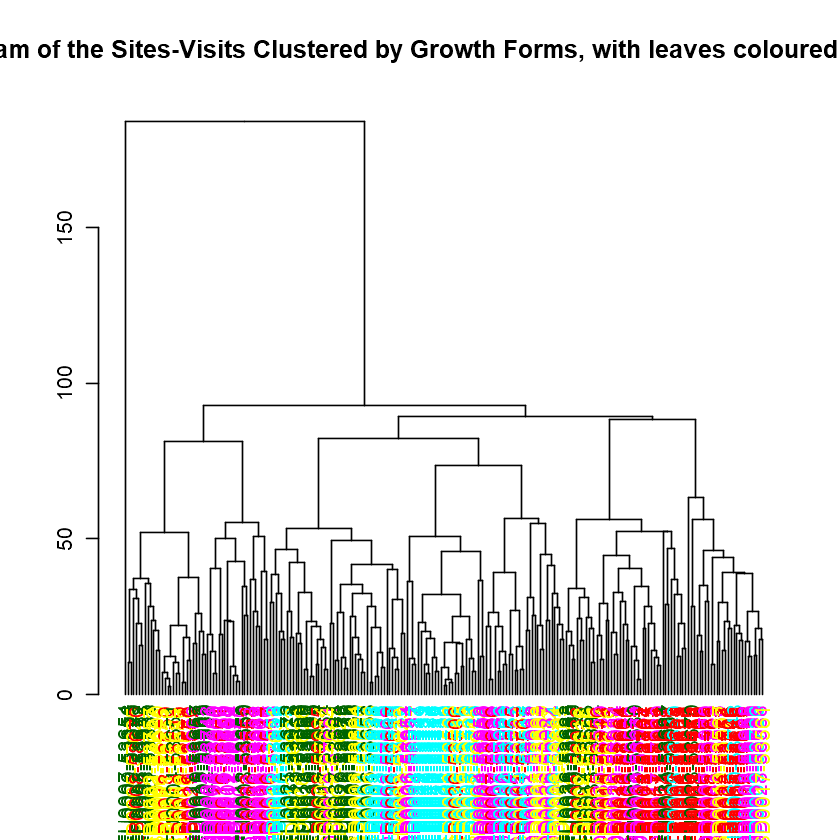

In [18]:

# Generate the Growth Form by Site-Visit Matrix
# =============================================
AP.BRTop5.GrowthFormBYSites = growth_form_table(AP.BioregTop5.l$veg.PI,                                                        m_kind="percent_cover", cover_type="PFC")  # % Cover
dim(AP.BRTop5.GrowthFormBYSites) # No of rows and cols in Matrix: Sites x Growth Forms
head(AP.BRTop5.GrowthFormBYSites)


# Enrich DF
# =========

# Create a 'site_unique' variable in Growth Form by Site-VisitTable to relate both datasets
# -----------------------------------------------------------------------------------------
AP.BRTop5.GrowthFormBYSites$site_unique = rownames(AP.BRTop5.GrowthFormBYSites)	

# Add: Bioregion, Longitude, Latitude
# -----------------------------------
# Both DF have different number of rows (again!)
dim(AP.BRTop5.GrowthFormBYSites)
dim(AP.BioregTop5.l$site.info) 

# Enrich with: Bioregion, Latitude, and Longitude								
AP.BRTop5.GrowthFormBYSites  = merge(AP.BRTop5.GrowthFormBYSites, AP.BioregTop5.l$site.info, by="site_unique")[,c(names(AP.BRTop5.GrowthFormBYSites), 
																							"bioregion.f", "longitude", "latitude")]
AP.BRTop5.GrowthFormBYSites = na.omit(AP.BRTop5.GrowthFormBYSites)
#head(AP.BRTop5.GrowthFormBYSites)
summary(AP.BRTop5.GrowthFormBYSites)
names(AP.BRTop5.GrowthFormBYSites)

# Summary Statistics for Each Growth Form
# =======================================
AP.BRTop5.GFBYSites.DescStats = data.frame(
  Min = apply(AP.BRTop5.GrowthFormBYSites[,1:(dim(AP.BRTop5.GrowthFormBYSites)[2]-4)], 2, min), # Minimum
  Med = apply(AP.BRTop5.GrowthFormBYSites[,1:(dim(AP.BRTop5.GrowthFormBYSites)[2]-4)], 2, median), # Median
  Max = apply(AP.BRTop5.GrowthFormBYSites[,1:(dim(AP.BRTop5.GrowthFormBYSites)[2]-4)], 2, max), # Maximum
  Mean = apply(AP.BRTop5.GrowthFormBYSites[,1:(dim(AP.BRTop5.GrowthFormBYSites)[2]-4)], 2, mean), # Mean
  SD = apply(AP.BRTop5.GrowthFormBYSites[,1:(dim(AP.BRTop5.GrowthFormBYSites)[2]-4)], 2, sd) # Standard Deviation
  )
AP.BRTop5.GFBYSites.DescStats = round(AP.BRTop5.GFBYSites.DescStats, 2)
AP.BRTop5.GFBYSites.DescStats


# Create and Plot a Dendogram of the Sites-Visits Clustered by Growth Forms
# =========================================================================

# Add rownames to be used as Leaves Names
rownames(AP.BRTop5.GrowthFormBYSites) = AP.BRTop5.GrowthFormBYSites$site_unique

# Create Dendogram
AP.BRTop5.GFBYSites.dend = as.dendrogram(hclust(dist(AP.BRTop5.GrowthFormBYSites[,1: (dim(AP.BRTop5.GrowthFormBYSites)[2]-4)]), "average"))

# Color the Leaves by Bioregion
# NOTE: The most sampled bioregions might change as new data is added. If so, bioregions codes below should be revised.
# The (currently) most common codes correspond to: MDD (Murry Darling Depression), SSD (Simpson 
# Strzelecki Dunefields), GFU (Gulf Fall and Uplands), STP (Stony Plains), 
# PIL (Pilbara), FLB (Flinders Lofty Block).
# For example, here PIL is commented out 'cos when writting the current version of this tutorial it wasn't one of the 5 most 
# sampled bioregions. However, in the previous version of this tutorial PIL was included, and FLB wasn't among the 5 most 
# sampled bioregions.

AP.BRTop5.GrowthFormBYSites$bioregion.col.f = AP.BRTop5.GrowthFormBYSites$bioregion.f
levels(AP.BRTop5.GrowthFormBYSites$bioregion.col.f)[levels(AP.BRTop5.GrowthFormBYSites$bioregion.col.f) == "GFU"] = "darkgreen"
levels(AP.BRTop5.GrowthFormBYSites$bioregion.col.f)[levels(AP.BRTop5.GrowthFormBYSites$bioregion.col.f) == "MDD"] = "magenta"
#levels(AP.BRTop5.GrowthFormBYSites$bioregion.col.f)[levels(AP.BRTop5.GrowthFormBYSites$bioregion.col.f) == "PIL"] = "red"
levels(AP.BRTop5.GrowthFormBYSites$bioregion.col.f)[levels(AP.BRTop5.GrowthFormBYSites$bioregion.col.f) == "FLB"] = "red"
levels(AP.BRTop5.GrowthFormBYSites$bioregion.col.f)[levels(AP.BRTop5.GrowthFormBYSites$bioregion.col.f) == "SSD"] = "yellow"
levels(AP.BRTop5.GrowthFormBYSites$bioregion.col.f)[levels(AP.BRTop5.GrowthFormBYSites$bioregion.col.f) == "STP"] = "cyan"
dend.colors = as.character(AP.BRTop5.GrowthFormBYSites$bioregion.col.f)
#dend.colors
dend.colors = dend.colors[order.dendrogram(AP.BRTop5.GFBYSites.dend)]
#dend.colors
labels_colors(AP.BRTop5.GFBYSites.dend) = dend.colors
# Plot Dendrogram
par(mfrow=c(1,1))
plot(AP.BRTop5.GFBYSites.dend, 
     main="Dendogram of the Sites-Visits Clustered by Growth Forms, with leaves coloured by Bioregion")


### VEGETATION COVER BY GROWTH FORM AND/OR HEIGHT: `single_cover_value` function (for 5 most sampled bioregions).

The `single_cover_value` function in the `auplotsR` package calculates Vegetation Cover Values for particular Growth Form Types and/or Height Thresholds per Site from Raw AusPlots Vegetation Point Intercept data. The `growth_form_table` function can also be used to calculate Cover Values for all Vegetation Growth Form Types; however, `single_cover_value` can perform these computations for:
* Particular vegetation growth form types (i.e. for individual growth forms or any combination of growth form types).
* Vegetation higher that a specified height threshold
* Vegetation with any combination of growth form types and minimum height

Specifically `single_cover_value` takes the following inputs via its arguments:
* `veg.PI`: Raw Vegetation Point Intercept data from AusPlots. A veg.PI data frame generated by the `get_ausplots` function (see above).
* `in_canopy_sky`: Method used to calculate Cover. A logical value that indicates whether to use in ‘canopy sky hits’ (i.e. calculate ‘opaque canopy cover’) or ‘projected foliage cover’. The default value, ‘FALSE’, calculates ‘projected foliage cover’. To calculate ‘opaque canopy cover’ the argument must be set to ‘TRUE’.
* `by.growth_form`: Whether to calculate Cover for a Subset by Growth Form type. A logical value that indicates whether to subset by growth form type. The default, ‘TRUE’, calculates cover for the growth form types specified in the argument ‘my.growth_forms’ (see next). If set to ‘FALSE’, cover calculations are conducted only for the vegetation sub-set by a provided Minimum Height Threshold.
* `my.growth_forms`: Growth Form Types used to Subset Data used for the Cover Calculations. A character vector specifying the growth form types to subset the data used for the cover calculations. Any combination of growth form types can be used. The default, ‘c("Tree/Palm", "Tree Mallee")’, is set to represent trees. It applies only when ‘by.growth_form=TRUE’; otherwise, this argument is ignored and only height sub-setting is applied.
* `min.height`: Minimum Height Threshold used to Subset Data used for the Cover Calculations. A numeric value indicating the minimum height (in metres) of the vegetation to be included in the subset of the data used for the cover calculations. A height must be always provided. The default, ‘5’, is set up for a cover of trees. It can be set to ‘0’ to ignore height and thus include any plant hit. If set to a ‘negative number’, it will return nonsensical output.

The `single_cover_value` function returns a data frame with two columns. The data frame rows correspond to unique sites, while the two columns correspond to the unique site and the percentage cover for the requested subset of vegetation (e.g. “Tree/Palm” higher than '5' metres).
 
When `by.growth_form = FALSE` and `min.height = 0`, the output is nearly the same as the green cover fraction returned by the `fractional_cover` function (see above). The values can differ because ‘fractional_cover’ applies a ‘height rule’ in which the highest intercept at a given point is taken, whereas ‘single_cover_value’ finds any green cover. For example, when dead trees overhang green understorey the values returned by both functions can differ. For general cover purposes, using ‘fractional_cover’ is recommended.  ‘single_cover_value’ is best suited to calculate cover subset by height and growth form.


Next, several examples of how to compute, manipulate, and visualise 'Single' Vegetation Cover Fraction (VCF) data are presented. The examples cover different scenarios for subsetting the input vegetation point intercept data frame prior to the calculation of the corresponding VCF. These include:

* Subsetting only by Height
* Subsetting only by Taxonomoy
* Subsetting by Height and Taxonomy


#### Subsetting by Height only


site_unique,VCF.gt0,VCF.gt2
NSAMDD0001-56965,45.74,0.00
NSAMDD0002-56952,55.45,39.21
NSAMDD0003-56968,47.52,4.65
NSAMDD0004-56953,35.05,10.99
NSAMDD0005-56969,31.29,23.76
NSAMDD0006-56954,34.95,11.29


           site_unique     VCF.gt0         VCF.gt2     
 NSAMDD0001-56965:  1   Min.   : 0.20   Min.   : 0.00  
 NSAMDD0002-56952:  1   1st Qu.:20.20   1st Qu.: 0.30  
 NSAMDD0003-56968:  1   Median :33.40   Median : 8.12  
 NSAMDD0004-56953:  1   Mean   :36.31   Mean   :12.97  
 NSAMDD0005-56969:  1   3rd Qu.:50.40   3rd Qu.:20.89  
 NSAMDD0006-56954:  1   Max.   :84.06   Max.   :70.89  
 (Other)         :219                                  

site_unique,VCF.gt0,VCF.gt2,VCF.0to2
NSAMDD0001-56965,45.74,0.00,45.74
NSAMDD0002-56952,55.45,39.21,16.24
NSAMDD0003-56968,47.52,4.65,42.87
NSAMDD0004-56953,35.05,10.99,24.06
NSAMDD0005-56969,31.29,23.76,7.53
NSAMDD0006-56954,34.95,11.29,23.66


           site_unique     VCF.gt0         VCF.gt2         VCF.0to2    
 NSAMDD0001-56965:  1   Min.   : 0.20   Min.   : 0.00   Min.   : 0.20  
 NSAMDD0002-56952:  1   1st Qu.:20.20   1st Qu.: 0.30   1st Qu.:12.28  
 NSAMDD0003-56968:  1   Median :33.40   Median : 8.12   Median :20.49  
 NSAMDD0004-56953:  1   Mean   :36.31   Mean   :12.97   Mean   :23.34  
 NSAMDD0005-56969:  1   3rd Qu.:50.40   3rd Qu.:20.89   3rd Qu.:32.67  
 NSAMDD0006-56954:  1   Max.   :84.06   Max.   :70.89   Max.   :68.02  
 (Other)         :219                                                  

[1] 225   4

[1] 231  44

site_unique,VCF.gt0,VCF.gt2,VCF.0to2,bioregion.f,longitude,latitude
NSAMDD0001-56965,45.74,0.00,45.74,MDD,142.5602,-34.18392
NSAMDD0002-56952,55.45,39.21,16.24,MDD,142.6026,-34.20482
NSAMDD0003-56968,47.52,4.65,42.87,MDD,142.6041,-34.20754
NSAMDD0004-56953,35.05,10.99,24.06,MDD,142.5594,-34.16537
NSAMDD0005-56969,31.29,23.76,7.53,MDD,143.2039,-33.65619
NSAMDD0006-56954,34.95,11.29,23.66,MDD,143.1665,-33.66432


           site_unique     VCF.gt0         VCF.gt2         VCF.0to2    
 NSAMDD0001-56965:  1   Min.   : 0.20   Min.   : 0.00   Min.   : 0.20  
 NSAMDD0002-56952:  1   1st Qu.:20.20   1st Qu.: 0.30   1st Qu.:12.28  
 NSAMDD0003-56968:  1   Median :33.40   Median : 8.12   Median :20.49  
 NSAMDD0004-56953:  1   Mean   :36.31   Mean   :12.97   Mean   :23.34  
 NSAMDD0005-56969:  1   3rd Qu.:50.40   3rd Qu.:20.89   3rd Qu.:32.67  
 NSAMDD0006-56954:  1   Max.   :84.06   Max.   :70.89   Max.   :68.02  
 (Other)         :219                                                  
 bioregion.f   longitude        latitude     
 FLB:48      Min.   :132.9   Min.   :-35.08  
 GFU:41      1st Qu.:136.3   1st Qu.:-33.09  
 MDD:50      Median :138.2   Median :-28.43  
 SSD:46      Mean   :138.3   Mean   :-27.35  
 STP:40      3rd Qu.:139.3   3rd Qu.:-23.83  
             Max.   :145.8   Max.   :-14.05  
                                             

[1] "site_unique" "VCF.gt0"     "VCF.gt2"     "VCF.0to2"    "bioregion.f"
[6] "longitude"   "latitude"

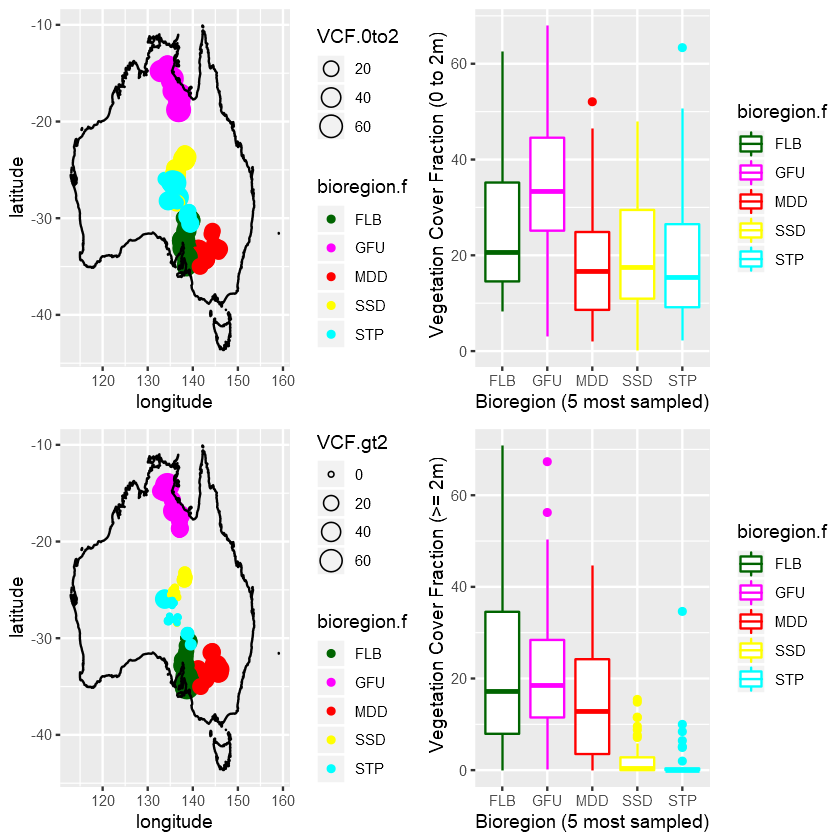

In [19]:

# Subsetting by Height only
# *************************

# Compute Single Cover Values Tables
# ==================================
# Any green vegeation (i.e. >= 0m in height)
veg.cover.gt0 = single_cover_value(AP.BioregTop5.l$veg.PI, by.growth_form=FALSE, min.height=0)
# Any green vegeation >= 2m in height
veg.cover.gt2 = single_cover_value(AP.BioregTop5.l$veg.PI, by.growth_form=FALSE, min.height=2)


# Combine all Tables into a Sigle Data Frame
# ==========================================
# Create a data frame containing all the Vegetation Cover Fractions
AP.BioregTop5.VCF.df = data.frame(site_unique=veg.cover.gt0$site_unique, VCF.gt0=veg.cover.gt0$percentCover, VCF.gt2=veg.cover.gt2$percentCover)
head(AP.BioregTop5.VCF.df)
summary(AP.BioregTop5.VCF.df)


# Enrich DF
# =========

# Compute Vegetation Cover Fractions for Height Ranges
# ----------------------------------------------------
AP.BioregTop5.VCF.df$VCF.0to2 = AP.BioregTop5.VCF.df$VCF.gt0 - AP.BioregTop5.VCF.df$VCF.gt2
head(AP.BioregTop5.VCF.df)
summary(AP.BioregTop5.VCF.df)

# Add: Bioregion, Longitude, Latitude
# -----------------------------------

# Both DF have different number of rows
dim(AP.BioregTop5.VCF.df)
dim(AP.BioregTop5.l$site.info) 

# Enrich with: Bioregion, Latitude, and Longitude								
AP.BioregTop5.VCF.df  = merge(AP.BioregTop5.VCF.df, AP.BioregTop5.l$site.info, by="site_unique")[,c(names(AP.BioregTop5.VCF.df), "bioregion.f", "longitude", "latitude")]
AP.BioregTop5.VCF.df = na.omit(AP.BioregTop5.VCF.df)
head(AP.BioregTop5.VCF.df)
summary(AP.BioregTop5.VCF.df)
names(AP.BioregTop5.VCF.df)


# Graphical Visualisation
# =======================

# VCF 0 to 2m: Map with circle size = the Vegetation Cover Fraction for any green veg. 
# ------------------------------------------------------------------------------------
# (i.e. >= 0m in height)
AP.BioregTop5.VCF.df.p1 = 
ggplot(data=AP.BioregTop5.VCF.df, aes(x=longitude, y=latitude, colour=bioregion.f, fill=bioregion.f), alpha =0.5) + 
geom_point(aes(size=VCF.0to2), pch=21) + 
scale_colour_manual(values = c("darkgreen", "magenta", "red", "yellow", "cyan")) +
scale_fill_manual(values = c("darkgreen", "magenta", "red", "yellow", "cyan")) +
geom_polygon(data=fortify(aus.sp), aes(x=long, y=lat, group=group), col="black", fill=NA)

# VCF 0 to 2m: Boxplot
# --------------------
AP.BioregTop5.VCF.df.p2 = 
ggplot(AP.BioregTop5.VCF.df, aes(x=bioregion.f, y=VCF.0to2, color=bioregion.f)) + 
geom_boxplot() + 
scale_colour_manual(values = c("darkgreen", "magenta", "red", "yellow", "cyan")) +
scale_fill_manual(name="Bioregions (Top 5)", values = c("darkgreen", "magenta", "red", "yellow", "cyan")) +
labs(x="Bioregion (5 most sampled)", y = "Vegetation Cover Fraction (0 to 2m)") + 
theme(plot.title = element_text(hjust = 0.5))

# VCF >= 2m: Map with circle size = the Vegetation Cover Fraction for any green veg. 
# ----------------------------------------------------------------------------------
# (i.e. >= 0m in height)
AP.BioregTop5.VCF.df.p3 = 
ggplot(data=AP.BioregTop5.VCF.df, aes(x=longitude, y=latitude, colour=bioregion.f, fill=bioregion.f), alpha =0.5) + 
geom_point(aes(size=VCF.gt2), pch=21) + 
scale_colour_manual(values = c("darkgreen", "magenta", "red", "yellow", "cyan")) +
scale_fill_manual(values = c("darkgreen", "magenta", "red", "yellow", "cyan")) +
geom_polygon(data=fortify(aus.sp), aes(x=long, y=lat, group=group), col="black", fill=NA)

# VCF  >= 2m: Boxplot
# -------------------
AP.BioregTop5.VCF.df.p4 = 
ggplot(AP.BioregTop5.VCF.df, aes(x=bioregion.f, y=VCF.gt2, color=bioregion.f)) + 
geom_boxplot() + 
scale_colour_manual(values = c("darkgreen", "magenta", "red", "yellow", "cyan")) +
scale_fill_manual(name="Bioregions (Top 5)", values = c("darkgreen", "magenta", "red", "yellow", "cyan")) +
labs(x="Bioregion (5 most sampled)", y = "Vegetation Cover Fraction (>= 2m)") + 
theme(plot.title = element_text(hjust = 0.5))

# Plot both graphs
# ----------------
grid.arrange(AP.BioregTop5.VCF.df.p1, AP.BioregTop5.VCF.df.p2, 
             AP.BioregTop5.VCF.df.p3, AP.BioregTop5.VCF.df.p4, nrow=2)
#grid.arrange(AP.BioregTop5.VCF.df.p1, AP.BioregTop5.VCF.df.p2,
#             AP.BioregTop5.VCF.df.p3, AP.BioregTop5.VCF.df.p4, ncol=2)



#### Subsetting by Taxonomy only 


site_unique,VCF.trees,VCF.grass
NSAMDD0001-56965,0.00,0.89
NSAMDD0002-56952,42.57,17.33
NSAMDD0003-56968,0.20,0.00
NSAMDD0004-56953,10.40,0.00
NSAMDD0005-56969,24.65,0.10
NSAMDD0006-56954,11.68,0.00


           site_unique    VCF.trees       VCF.grass    
 NSAMDD0001-56965:  1   Min.   : 0.00   Min.   : 0.00  
 NSAMDD0002-56952:  1   1st Qu.: 0.00   1st Qu.: 0.69  
 NSAMDD0003-56968:  1   Median : 3.07   Median : 6.14  
 NSAMDD0004-56953:  1   Mean   :10.54   Mean   :13.10  
 NSAMDD0005-56969:  1   3rd Qu.:16.73   3rd Qu.:21.09  
 NSAMDD0006-56954:  1   Max.   :70.89   Max.   :67.43  
 (Other)         :219                                  

[1] 225   3

[1] 231  44

site_unique,VCF.trees,VCF.grass,bioregion.f,longitude,latitude
NSAMDD0001-56965,0.00,0.89,MDD,142.5602,-34.18392
NSAMDD0002-56952,42.57,17.33,MDD,142.6026,-34.20482
NSAMDD0003-56968,0.20,0.00,MDD,142.6041,-34.20754
NSAMDD0004-56953,10.40,0.00,MDD,142.5594,-34.16537
NSAMDD0005-56969,24.65,0.10,MDD,143.2039,-33.65619
NSAMDD0006-56954,11.68,0.00,MDD,143.1665,-33.66432


           site_unique    VCF.trees       VCF.grass     bioregion.f
 NSAMDD0001-56965:  1   Min.   : 0.00   Min.   : 0.00   FLB:48     
 NSAMDD0002-56952:  1   1st Qu.: 0.00   1st Qu.: 0.69   GFU:41     
 NSAMDD0003-56968:  1   Median : 3.07   Median : 6.14   MDD:50     
 NSAMDD0004-56953:  1   Mean   :10.54   Mean   :13.10   SSD:46     
 NSAMDD0005-56969:  1   3rd Qu.:16.73   3rd Qu.:21.09   STP:40     
 NSAMDD0006-56954:  1   Max.   :70.89   Max.   :67.43              
 (Other)         :219                                              
   longitude        latitude     
 Min.   :132.9   Min.   :-35.08  
 1st Qu.:136.3   1st Qu.:-33.09  
 Median :138.2   Median :-28.43  
 Mean   :138.3   Mean   :-27.35  
 3rd Qu.:139.3   3rd Qu.:-23.83  
 Max.   :145.8   Max.   :-14.05  
                                 

[1] "site_unique" "VCF.trees"   "VCF.grass"   "bioregion.f" "longitude"  
[6] "latitude"

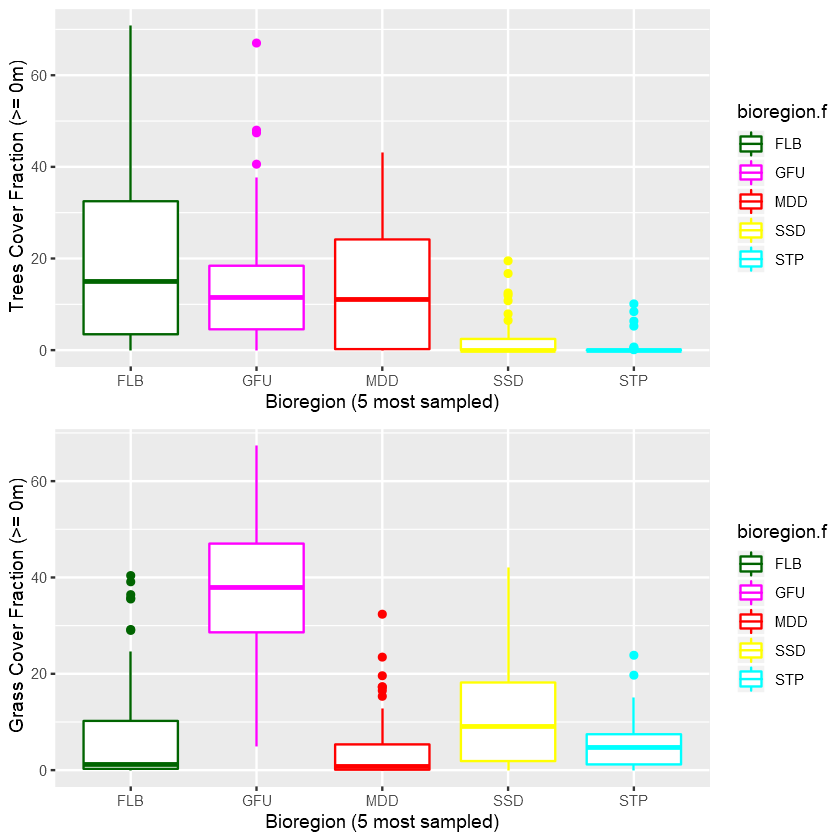

In [20]:

# Subsetting y Taxonomy only
# ***************************

# Compute Single Cover Values Tables
# ==================================
# Trees (by default my.growth_forms=c("Tree/Palm", "Tree Mallee"))
veg.cover.trees = single_cover_value(AP.BioregTop5.l$veg.PI, min.height=0)
# Grasses (my.growth_forms=c("Hummock.grass", "Tussock.grass"))
veg.cover.grass = single_cover_value(AP.BioregTop5.l$veg.PI, by.growth_form=TRUE, my.growth_forms=c("Hummock grass", "Tussock grass"), min.height=0)


# Combine all Tables into a Sigle Data Frame
# ==========================================
# Create a data frame containing all the Vegetation Cover Fractions
AP.BioregTop5.VCF.df = data.frame(site_unique=veg.cover.trees$site_unique, VCF.trees=veg.cover.trees$percentCover, VCF.grass=veg.cover.grass$percentCover)
head(AP.BioregTop5.VCF.df)
summary(AP.BioregTop5.VCF.df)


# Enrich DF
# =========

# Add: Bioregion, Longitude, Latitude
# -----------------------------------

# Both DF have different number of rows
dim(AP.BioregTop5.VCF.df)
dim(AP.BioregTop5.l$site.info) 

# Enrich with: Bioregion, Latitude, and Longitude								
AP.BioregTop5.VCF.df  = merge(AP.BioregTop5.VCF.df, AP.BioregTop5.l$site.info, by="site_unique")[,c(names(AP.BioregTop5.VCF.df), "bioregion.f", "longitude", "latitude")]
AP.BioregTop5.VCF.df = na.omit(AP.BioregTop5.VCF.df)
head(AP.BioregTop5.VCF.df)
summary(AP.BioregTop5.VCF.df)
names(AP.BioregTop5.VCF.df)


# Graphical Visualisation
# =======================

# Trees: Boxplot
# --------------
AP.BioregTop5.VCF.trees = 
ggplot(AP.BioregTop5.VCF.df, aes(x=bioregion.f, y=VCF.trees, color=bioregion.f)) + 
geom_boxplot() + 
scale_colour_manual(values = c("darkgreen", "magenta", "red", "yellow", "cyan")) +
scale_fill_manual(name="Bioregions (Top 5)", values = c("darkgreen", "magenta", "red", "yellow", "cyan")) +
labs(x="Bioregion (5 most sampled)", y = "Trees Cover Fraction (>= 0m)") + 
theme(plot.title = element_text(hjust = 0.5))

# Grass: Boxplot
# --------------
AP.BioregTop5.VCF.grass = 
ggplot(AP.BioregTop5.VCF.df, aes(x=bioregion.f, y=VCF.grass, color=bioregion.f)) + 
geom_boxplot() + 
scale_colour_manual(values = c("darkgreen", "magenta", "red", "yellow", "cyan")) +
scale_fill_manual(name="Bioregions (Top 5)", values = c("darkgreen", "magenta", "red", "yellow", "cyan")) +
labs(x="Bioregion (5 most sampled)", y = "Grass Cover Fraction (>= 0m)") + 
theme(plot.title = element_text(hjust = 0.5))

# Plot both graphs
# ----------------
grid.arrange(AP.BioregTop5.VCF.trees, AP.BioregTop5.VCF.grass, nrow=2)
#grid.arrange(AP.BioregTop5.BA.trees, AP.BioregTop5.VCF.grass, ncol=2)



#### Subsetting by Taxonomy and Height


[1] TRUE

[1] 225   2

[1] 231  44

site_unique,percentCover,bioregion.f,longitude,latitude
NSAMDD0001-56965,0.00,MDD,142.5602,-34.18392
NSAMDD0002-56952,3.56,MDD,142.6026,-34.20482
NSAMDD0003-56968,0.00,MDD,142.6041,-34.20754
NSAMDD0004-56953,8.51,MDD,142.5594,-34.16537
NSAMDD0005-56969,6.93,MDD,143.2039,-33.65619
NSAMDD0006-56954,8.22,MDD,143.1665,-33.66432


           site_unique   percentCover    bioregion.f   longitude    
 NSAMDD0001-56965:  1   Min.   : 0.000   FLB:48      Min.   :132.9  
 NSAMDD0002-56952:  1   1st Qu.: 0.000   GFU:41      1st Qu.:136.3  
 NSAMDD0003-56968:  1   Median : 0.200   MDD:50      Median :138.2  
 NSAMDD0004-56953:  1   Mean   : 6.478   SSD:46      Mean   :138.3  
 NSAMDD0005-56969:  1   3rd Qu.: 7.720   STP:40      3rd Qu.:139.3  
 NSAMDD0006-56954:  1   Max.   :70.000               Max.   :145.8  
 (Other)         :219                                               
    latitude     
 Min.   :-35.08  
 1st Qu.:-33.09  
 Median :-28.43  
 Mean   :-27.35  
 3rd Qu.:-23.83  
 Max.   :-14.05  
                 

[1] "site_unique"  "percentCover" "bioregion.f"  "longitude"    "latitude"

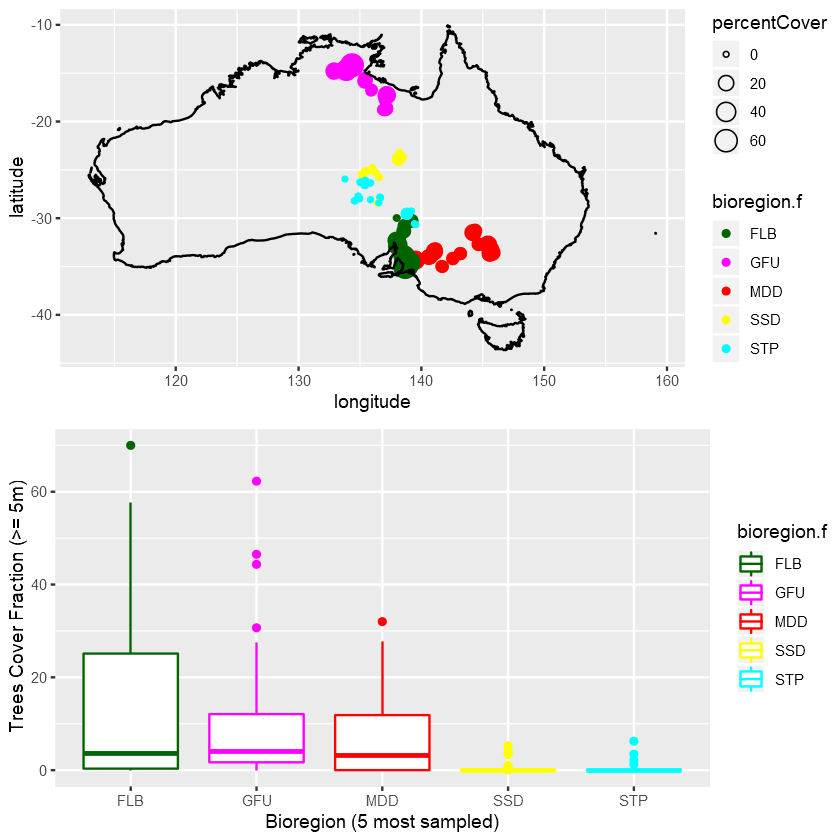

In [21]:

# Subsetting by Taxonomy and Height
# *********************************

# Compute Single Cover Values Tables
# ==================================
# Trees (by default my.growth_forms=c("Tree/Palm", "Tree Mallee"))
veg.cover.trees.gt5 = single_cover_value(AP.BioregTop5.l$veg.PI, by.growth_form=TRUE, my.growth_forms=c("Tree/Palm", "Tree Mallee"), min.height=5)

# These are the default values for the arguments of the function 'single_cover_value'
# So the following function call would produce exactly the same results
veg.cover.trees.gt5.2 = single_cover_value(AP.BioregTop5.l$veg.PI)
all.equal(veg.cover.trees.gt5, veg.cover.trees.gt5.2)
rm(veg.cover.trees.gt5.2)


# Enrich DF
# =========

# Add: Bioregion, Longitude, Latitude
# -----------------------------------

# Both DF have different number of rows
dim(veg.cover.trees.gt5)
dim(AP.BioregTop5.l$site.info) 

# Enrich with: Bioregion, Latitude, and Longitude								
AP.BioregTop5.VCF.trees.gt5.df  = merge(veg.cover.trees.gt5, AP.BioregTop5.l$site.info, by="site_unique")[,c(names(veg.cover.trees.gt5), "bioregion.f", "longitude", "latitude")]
AP.BioregTop5.VCF.trees.gt5.df = na.omit(AP.BioregTop5.VCF.trees.gt5.df)
head(AP.BioregTop5.VCF.trees.gt5.df)
summary(AP.BioregTop5.VCF.trees.gt5.df)
names(AP.BioregTop5.VCF.trees.gt5.df)


# Graphical Visualisation
# =======================

# Map with circle size = Percent Cover
# ------------------------------------
AP.BioregTop5.VCF.trees.gt5.p1 = 
ggplot(data=AP.BioregTop5.VCF.trees.gt5.df, aes(x=longitude, y=latitude, colour=bioregion.f, fill=bioregion.f), alpha =0.5) + 
geom_point(aes(size=percentCover), pch=21) + 
scale_colour_manual(values = c("darkgreen", "magenta", "red", "yellow", "cyan")) +
scale_fill_manual(values = c("darkgreen", "magenta", "red", "yellow", "cyan")) +
geom_polygon(data=fortify(aus.sp), aes(x=long, y=lat, group=group), col="black", fill=NA)

# Boxplot
# -------
AP.BioregTop5.VCF.trees.gt5.p2 = 
ggplot(AP.BioregTop5.VCF.trees.gt5.df, aes(x=bioregion.f, y=percentCover, color=bioregion.f)) + geom_boxplot() + 
scale_colour_manual(values = c("darkgreen", "magenta", "red", "yellow", "cyan")) +
scale_fill_manual(name="Bioregions (Top 5)", values = c("darkgreen", "magenta", "red", "yellow", "cyan")) +
labs(x="Bioregion (5 most sampled)", y = "Trees Cover Fraction (>= 5m)") + 
theme(plot.title = element_text(hjust = 0.5))

# Plot both graphs
# ----------------
grid.arrange(AP.BioregTop5.VCF.trees.gt5.p1, AP.BioregTop5.VCF.trees.gt5.p2, nrow=2)
#grid.arrange(AP.BioregTop5.VCF.trees.gt5.p1, AP.BioregTop5.VCF.trees.gt5.p2, ncol=2)



### BASAL AREA (OR NUMBER OF BASAL WEDGE HITS): `basal_area` function (for 5 most sampled bioregions).

The `basal_area` function in the `ausplotsR` package calculates the Basal Area or Mean Number of Basal Wedge Hits of plots using the raw basal wedge data returned by the `get_ausplots` function also in the `ausplotsR` package. 

The `basal_area` function has the following arguments:
* `veg.basal`: Name of the data frame containing the Raw Basal Wedge Data generated by the `get_ausplots` function in the `ausplotsR` package.
* `by.spp`: Whether Basal Wedge values are computed by Plot or Individual Species. This argument can take two values:
 * `FALSE`: The function returns combined values per plot. This is the default value for the argument.
 * `TRUE`: Returns values for individual species	
* `by.hits`: Whether the Basal Wedge values are computed as Basal Area or Mean Number of Individual Basal Wedge Hits. This argument can take two values:
 * `FALSE`: The function returns the Basal Area (in m2/ha). This is the default value for the argument.
 * `TRUE`: Returns the Mean Number of Individual Basal Wedge Hits.

This function returns a data frame with two columns. In this data frame rows correspond to representing Plots (or species by plots), the first column contains the unique sites names and the second column contains the Basal Area or Hit Scores depending on the value assigned to the `by.hits` argument.


In this section we will: 

  * Compute the Basal Area for each plot (m2/ha) using the `basal_area` function.
  * Enrich the data frame containing the Basal Area data with additional information (i.e. plot -Site-Visit-, bioregion, longitude, and latitude). 
  * Display Basal Areas on map of Australia (with Dots size proportional to Basal Area).
  * Boxplot of Basal Areas by Bioregion. 


 site_unique        basal_area_m2_ha 
 Length:115         Min.   : 0.2857  
 Class :character   1st Qu.: 1.8424  
 Mode  :character   Median : 3.9889  
                    Mean   : 5.9276  
                    3rd Qu.: 6.9861  
                    Max.   :40.2500  

site_unique,basal_area_m2_ha
NSAMDD0002-56952,4.583333
NSAMDD0004-56953,4.805556
NSAMDD0005-56969,5.538889
NSAMDD0006-56954,4.077778
NSAMDD0007-56970,4.205556
NSAMDD0009-56971,14.694444


[1] "site_unique"      "basal_area_m2_ha"

 site_unique        basal_area_m2_ha 
 Length:115         Min.   : 0.2857  
 Class :character   1st Qu.: 1.8424  
 Mode  :character   Median : 3.9889  
                    Mean   : 5.9276  
                    3rd Qu.: 6.9861  
                    Max.   :40.2500  

site_unique,basal_area_m2_ha
NSAMDD0002-56952,4.583333
NSAMDD0004-56953,4.805556
NSAMDD0005-56969,5.538889
NSAMDD0006-56954,4.077778
NSAMDD0007-56970,4.205556
NSAMDD0009-56971,14.694444


[1] 115   2

[1] 231  44

site_unique,basal_area_m2_ha,bioregion.f,longitude,latitude
NSAMDD0002-56952,4.583333,MDD,142.6026,-34.20482
NSAMDD0004-56953,4.805556,MDD,142.5594,-34.16537
NSAMDD0005-56969,5.538889,MDD,143.2039,-33.65619
NSAMDD0006-56954,4.077778,MDD,143.1665,-33.66432
NSAMDD0007-56970,4.205556,MDD,141.1608,-33.37998
NSAMDD0009-56971,14.694444,MDD,141.0655,-33.44049


 site_unique        basal_area_m2_ha  bioregion.f   longitude    
 Length:115         Min.   : 0.2857   FLB:38      Min.   :132.9  
 Class :character   1st Qu.: 1.8424   GFU:34      1st Qu.:137.0  
 Mode  :character   Median : 3.9889   MDD:28      Median :138.6  
                    Mean   : 5.9276   SSD: 9      Mean   :138.6  
                    3rd Qu.: 6.9861   STP: 6      3rd Qu.:139.4  
                    Max.   :40.2500               Max.   :145.8  
    latitude     
 Min.   :-35.08  
 1st Qu.:-33.35  
 Median :-30.41  
 Mean   :-27.05  
 3rd Qu.:-18.27  
 Max.   :-14.05  

[1] "site_unique"      "basal_area_m2_ha" "bioregion.f"      "longitude"       
[5] "latitude"

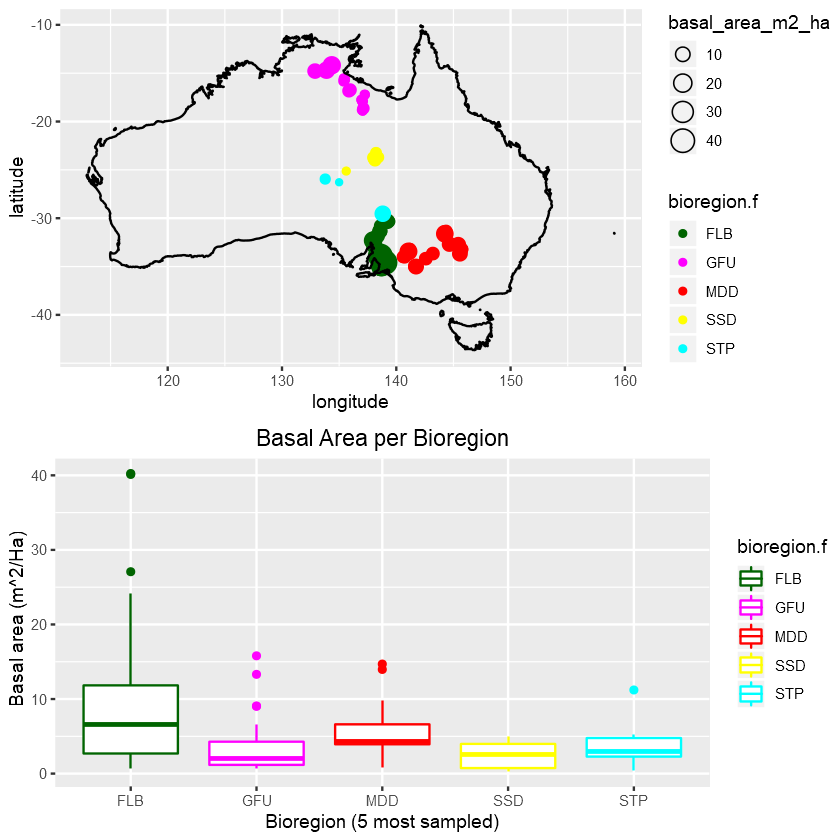

In [22]:

# Calculate Basal Area
# ====================
AP.BioregTop5.BA = basal_area(AP.BioregTop5.l$veg.basal)
summary(AP.BioregTop5.BA)
head(AP.BioregTop5.BA)


# Enrich DF
# =========
# Preparation
colnames(AP.BioregTop5.BA) 
summary(AP.BioregTop5.BA)
head(AP.BioregTop5.BA)

# Add: Bioregion, Longitude, Latitude
# -----------------------------------
# Both DF have different number of rows
dim(AP.BioregTop5.BA)
dim(AP.BioregTop5.l$site.info) 

# Enrich with: Bioregion, Latitude, and Longitude								
AP.BioregTop5.BA  = merge(AP.BioregTop5.BA, AP.BioregTop5.l$site.info, by="site_unique")[,c(names(AP.BioregTop5.BA), "bioregion.f", "longitude", "latitude")]
AP.BioregTop5.BA = na.omit(AP.BioregTop5.BA)
head(AP.BioregTop5.BA)
summary(AP.BioregTop5.BA)
names(AP.BioregTop5.BA)


# Graphical Visualisation
# =======================

# Map with circle size = Basal Area (m2/ha)
# -----------------------------------------
AP.BioregTop5.BA.p1 = 
ggplot(data=AP.BioregTop5.BA, aes(x=longitude, y=latitude, colour=bioregion.f, fill=bioregion.f), alpha =0.5) + 
geom_point(aes(size=basal_area_m2_ha), pch=21) + 
scale_colour_manual(values = c("darkgreen", "magenta", "red", "yellow", "cyan")) +
scale_fill_manual(values = c("darkgreen", "magenta", "red", "yellow", "cyan")) +
geom_polygon(data=fortify(aus.sp), aes(x=long, y=lat, group=group), col="black", fill=NA)

# Boxplot
# -------
AP.BioregTop5.BA.p2 = 
ggplot(AP.BioregTop5.BA, aes(x=bioregion.f, y=basal_area_m2_ha, color=bioregion.f)) + 
geom_boxplot() + 
scale_colour_manual(values = c("darkgreen", "magenta", "red", "yellow", "cyan")) +
scale_fill_manual(name="Bioregions (Top 5)", values = c("darkgreen", "magenta", "red", "yellow", "cyan")) +
labs(title="Basal Area per Bioregion",x="Bioregion (5 most sampled)", y = "Basal area (m^2/Ha)") + 
theme(plot.title = element_text(hjust = 0.5))

# Plot both graphs
# ----------------
grid.arrange(AP.BioregTop5.BA.p1, AP.BioregTop5.BA.p2, nrow=2)
#grid.arrange(AP.BioregTop5.BA.p1, AP.BioregTop5.BA.p2, ncol=2)
